<a href="https://colab.research.google.com/github/afiarodoshe/EEG-data-practice/blob/main/EEG_Data_Practice_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Download**

Kaggle install

In [3]:
! mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

Downloading the UPenn and Mayo Clinic's Seizure Detection Challenge Data from Kaggle

In [6]:
!kaggle competitions download -c seizure-detection --force

100% 10.1G/10.1G [02:25<00:00, 94.9MB/s]
100% 10.1G/10.1G [02:25<00:00, 74.4MB/s]


Unzipping the data

In [7]:
! unzip seizure-detection

Archive:  seizure-detection.zip
  inflating: clips.tar.gz            
  inflating: sampleSubmission.csv    
  inflating: sample_clip.mat.gz      


Unzipping the first patient

In [9]:
!tar xvzf clips.tar.gz Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/

Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_1.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_10.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_11.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_12.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_13.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_14.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_15.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_16.mat
Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/Patient_1_ictal_segment_17.mat
Volumes/Seagate/seizure_detection/competition_data/

The files are matlab files that can be loaded in using a function from scipy

In [10]:
upenn_ictal_list = []
upenn_interictal_list = []

# Use the python os module instead of a shell command to get the file list
import os
UPENN_P1_DATA_DIR = os.listdir('Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/')
upenn_P1_file_list = [file.strip() for file in UPENN_P1_DATA_DIR]

for file in upenn_P1_file_list:
  if 'interictal' in file: # Use the 'in' operator to check if substring is present
    upenn_interictal_list.append(file)
  elif 'ictal' in file:
    upenn_ictal_list.append(file)

upenn_seizure_file = upenn_ictal_list[1]
upenn_baseline_file = upenn_interictal_list[1]

# Construct the full file path
upenn_seizure_file_path = 'Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/' + upenn_seizure_file

from scipy.io import loadmat

# Load the .mat file using the full file path
mat = loadmat(upenn_seizure_file_path)
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: unix, Software: R v3.0.2, Created on: Mon Apr  7 23:28:26 2014',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[ 143.694,  119.694,  107.694, ...,  -39.306,  -91.306, -129.306],
        [ 722.114,  724.114,  735.114, ...,  460.114,  452.114,  449.114],
        [ 414.45 ,  406.45 ,  406.45 , ...,   99.45 ,  115.45 ,  112.45 ],
        ...,
        [  40.1  ,   26.1  ,    4.1  , ..., -184.9  , -193.9  , -202.9  ],
        [  84.544,   66.544,   47.544, ..., -151.456, -139.456, -156.456],
        [  -5.74 ,  -20.74 ,  -23.74 , ...,    2.26 ,    4.26 ,    7.26 ]]),
 'freq': array([499.906994]),
 'channels': array([[(array(['LFG1'], dtype='<U4'), array(['LFG10'], dtype='<U5'), array(['LFG11'], dtype='<U5'), array(['LFG12'], dtype='<U5'), array(['LFG13'], dtype='<U5'), array(['LFG14'], dtype='<U5'), array(['LFG15'], dtype='<U5'), array(['LFG16'], dtype='<U5'), array(['LFG17'], dtype='<U5'), array(['LFG18'], dtype='<U5'), array(['LF

Converting the matlab dataframe to a pandas DataFrame

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat  # Don't forget to import loadmat

def mat_to_df(file_path, output=False):
    """
    Converts a MATLAB .mat file to a pandas DataFrame.

    Parameters:
        file_path (str): Path to the .mat file.
        output (bool): If True, displays the first few rows of the DataFrame.

    Returns:
        df (pandas.DataFrame): The converted DataFrame.
        freq (float): The frequency value extracted from the .mat file.
    """
    # Load the .mat file
    mat = loadmat(file_path)

    # Extract data, channels, and frequency from the .mat file
    data = mat['data']          # The EEG data
    channels = mat['channels']  # Channel names
    freq = mat['freq'][0]       # Sampling frequency

    # Convert the channels array to a list of strings
    channels_list = [channel[0] for channel in channels[0][0]]

    # Create a DataFrame using the data and channel names as index
    df = pd.DataFrame(data, index=channels_list).T

    # Remove columns where all values are the same (no variation)
    df = df.loc[:, (df != df.iloc[0]).any()]

    # Optionally display the first few rows of the DataFrame
    if output:
        display(df.head())

    return df, freq

# Define color formatting using ANSI escape codes
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

# Define the file paths (replace with your actual paths or variables)
upenn_seizure_file = 'Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/' + upenn_seizure_file
upenn_baseline_file = 'Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/' + upenn_baseline_file

# Display seizure data with formatting
print(color.BOLD + color.UNDERLINE + 'Ictal' + color.END)
upenn_seizure_df, upenn_seizure_freq = mat_to_df(upenn_seizure_file, output=True)

# Display a blank line for better readability
print()

# Display baseline data with formatting
print(color.BOLD + color.UNDERLINE + 'Interictal' + color.END)
upenn_baseline_df, upenn_baseline_freq = mat_to_df(upenn_baseline_file, output=True)


Ictal


LFG1    LFG10   LFG11    LFG12    LFG13    LFG14    LFG15   LFG16  \
0  143.694  722.114  414.45  755.134 -144.326  208.836  264.728  37.248   
1  119.694  724.114  406.45  740.134 -144.326  223.836  279.728  11.248   
2  107.694  735.114  406.45  739.134 -129.326  215.836  300.728  -5.752   
3  131.694  750.114  421.45  738.134  -77.326  233.836  293.728 -16.752   
4  151.694  776.114  432.45  764.134  -32.326  259.836  269.728   7.248   

    LFG17    LFG18  ...    LFG62    LFG63    LFG64    LFG7    LFG8    LFG9  \
0 -541.03 -143.262  ...  301.838  527.942  744.822  279.31   79.05 -72.268   
1 -543.03 -143.262  ...  294.838  500.942  741.822  268.31   92.05 -81.268   
2 -531.03 -125.262  ...  264.838  462.942  713.822  274.31  114.05 -68.268   
3 -515.03 -125.262  ...  271.838  454.942  705.822  267.31  139.05 -51.268   
4 -504.03 -121.262  ...  292.838  448.942  723.822  292.31  176.05 -47.268   

      LFS1  LFS2    LFS3   LFS4  
0  354.128  40.1  84.544  -5.74  
1  390.128  26.1  66.544 -20.74  
2  396.128   4.1  47.544 -23.74  
3  371.128  -5.9  47.544 -11.74  
4  322.128  -5.9  48.544  -3.74  

[5 rows x 68 columns]


Interictal


LFG1   LFG10   LFG11  LFG12    LFG13    LFG14    LFG15    LFG16  \
0 -164.924  22.608  514.43  79.45  204.728  422.324  460.404  276.302   
1 -137.924  -9.392  497.43  35.45  211.728  474.324  562.404  276.302   
2 -134.924 -50.392  515.43  41.45  204.728  532.324  685.404  251.302   
3 -118.924 -45.392  524.43  32.45  173.728  635.324  784.404  230.302   
4  -97.924 -30.392  520.43  12.45  139.728  748.324  857.404  190.302   

     LFG17    LFG18  ...    LFG62   LFG63    LFG64     LFG7     LFG8    LFG9  \
0 -174.144 -250.818  ... -219.684 -78.106 -108.946  527.146  122.556  175.52   
1 -108.144 -233.818  ... -254.684 -76.106 -111.946  543.146  105.556  158.52   
2  -23.144 -237.818  ... -255.684 -85.106 -110.946  549.146  107.556  158.52   
3   47.856 -238.818  ... -242.684 -88.106 -117.946  531.146   79.556  176.52   
4   88.856 -189.818  ... -219.684 -85.106 -122.946  504.146   72.556  190.52   

      LFS1     LFS2     LFS3     LFS4  
0 -235.228  450.812  725.338  150.148  
1 -226.228  461.812  740.338  170.148  
2 -225.228  456.812  741.338  183.148  
3 -260.228  477.812  717.338  208.148  
4 -311.228  549.812  694.338  244.148  

[5 rows x 68 columns]

Plot the data

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 22.7 MB/s eta 0:00:00
Interictal


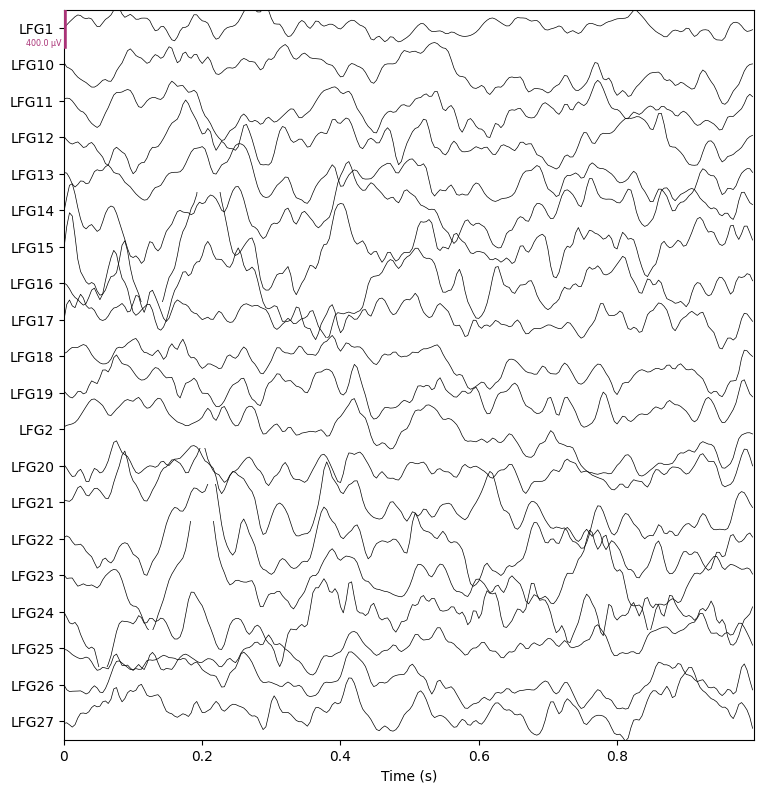


Ictal


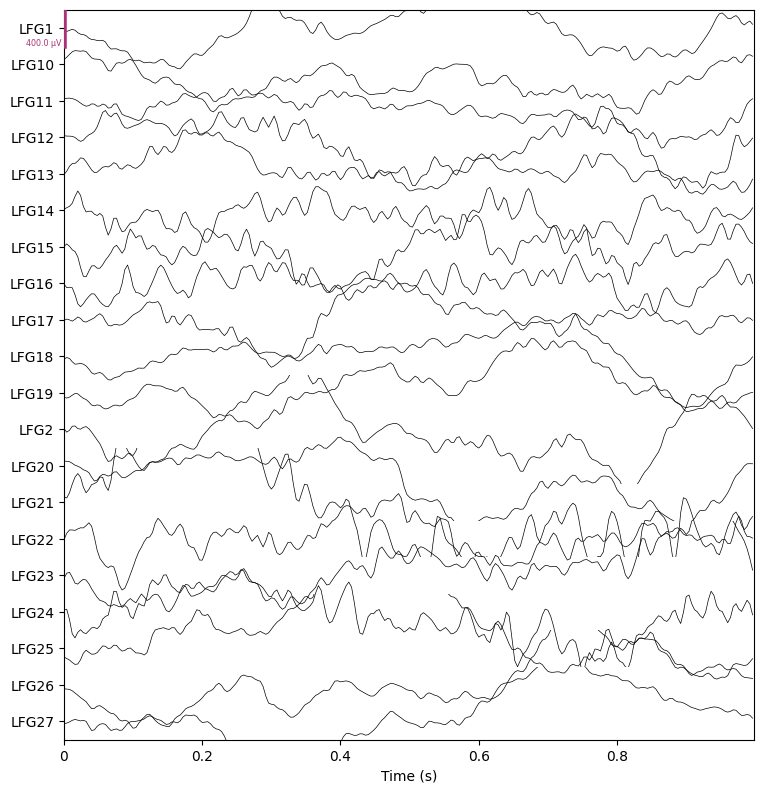

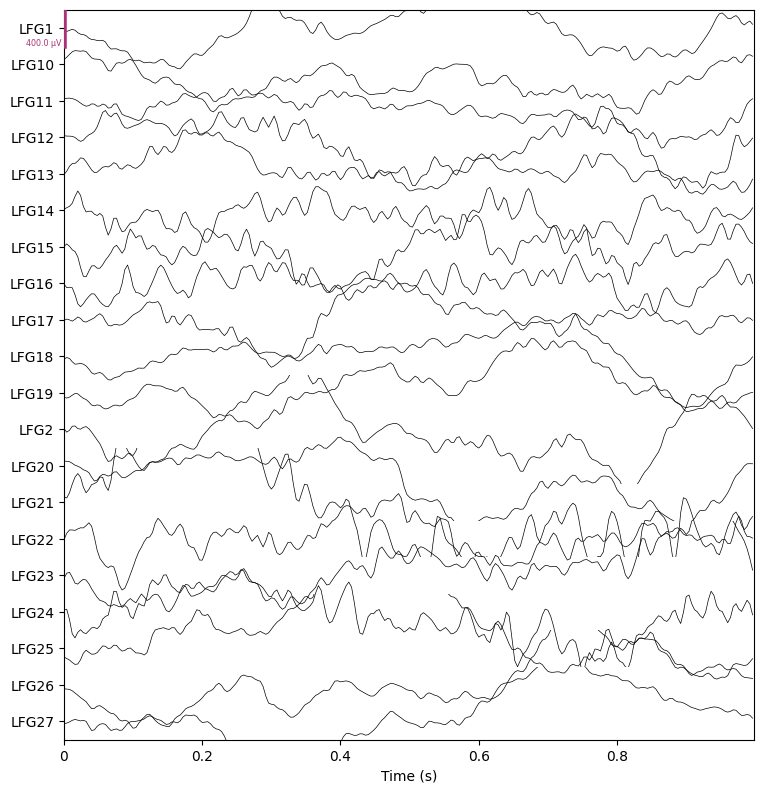

In [12]:
!pip install mne
import mne # Import the mne library

!pip install termcolor # Install the termcolor library to enable color formatting
from termcolor import colored

# set mne to only output warnings
mne.set_log_level('WARNING')

def mne_object(data, freq):
  # create an mne info file with meta data about the EEG
  info = mne.create_info(ch_names=list(data.columns),
                         sfreq=freq,
                         ch_types=['eeg']*data.shape[-1])

  # data needs to be in volts rather than in microvolts
  data = data.apply(lambda x: x*1e-6)
  # transpose the data
  data_T = data.transpose()

  # create raw mne object
  raw = mne.io.RawArray(data_T, info)

  return raw


plot_kwargs = {
    'scalings': dict(eeg=20e-5),   # zooms the plot out
    'highpass': 0.5,              # filters out low frequencies
    'lowpass': 70.,                # filters out high frequencies
    'show_scrollbars': False,
    'show': True
}

print(colored('Interictal', 'white', 'on_grey', attrs=['bold', 'underline'])) # Use colored function from termcolor
upenn_baseline_mne = mne_object(upenn_baseline_df, upenn_baseline_freq)
upenn_baseline_mne.plot(**plot_kwargs);
print()
print(colored('Ictal', 'white', 'on_grey', attrs=['bold', 'underline'])) # Use colored function from termcolor
upenn_seizure_mne = mne_object(upenn_seizure_df, upenn_seizure_freq)
upenn_seizure_mne.plot(**plot_kwargs)

Ictal


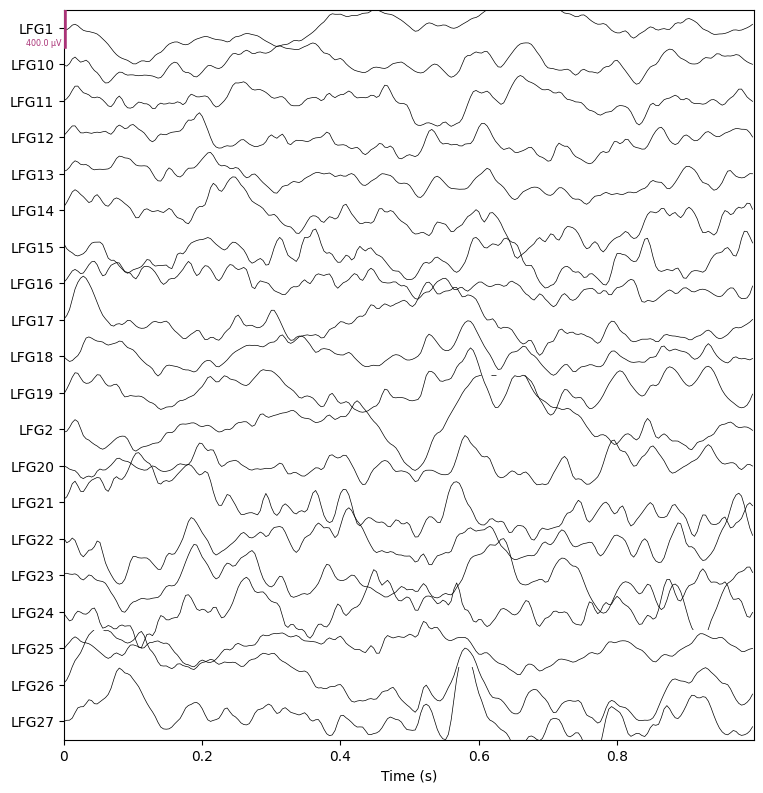

Interictal


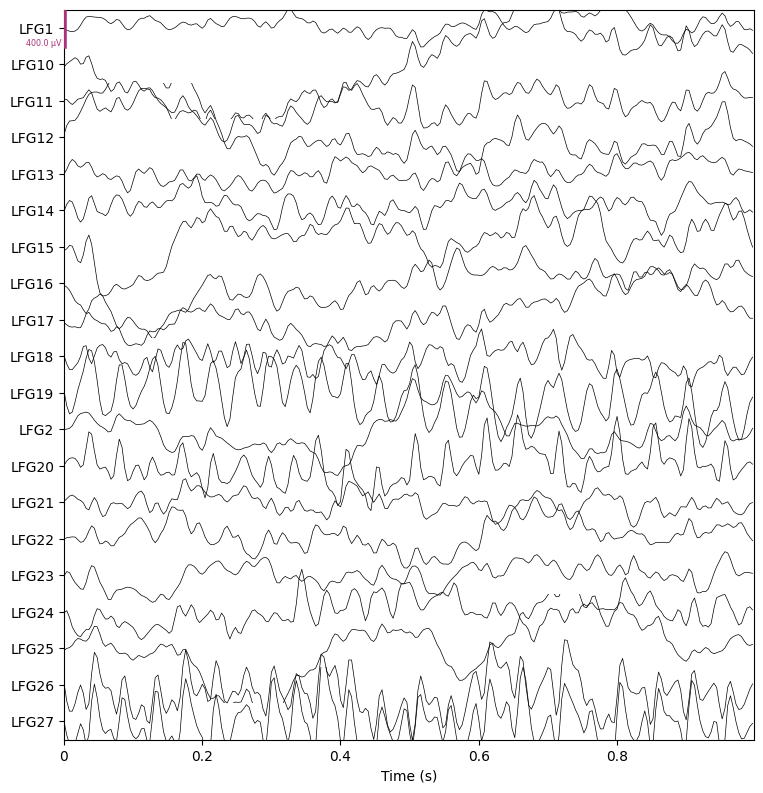

In [13]:
!pip install mne
import mne # Import the mne library

!pip install termcolor # Install the termcolor library to enable color formatting
from termcolor import colored # Import the colored function from termcolor
import random # Import the random module

# set mne to only output warnings
mne.set_log_level('WARNING')

# Define the base directory path
base_dir = 'Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1/'

for i, sampled_files in enumerate([random.sample(upenn_interictal_list, 1),
                                   random.sample(upenn_ictal_list, 1)]):

  if i == 0:
    # Use the colored function from termcolor to format the output
    print(colored('Ictal', 'white', 'on_grey', attrs=['bold', 'underline']))
  else:
    # Use the colored function from termcolor to format the output
    print(colored('Interictal', 'white', 'on_grey', attrs=['bold', 'underline']))
  for file in sampled_files:
      # Construct the full file path by joining the base directory and filename
      full_file_path = os.path.join(base_dir, file)
      upenn_df, upenn_freq = mat_to_df(full_file_path) # Pass the full file path to mat_to_df
      upenn_mne = mne_object(upenn_df, upenn_freq)
      upenn_mne.plot(**plot_kwargs)

### **Pre-Processing & Feature Engineering**

**Environment Set-up**

In [14]:
!pip install matplotlib pandas numpy scipy seaborn mne
!pip install beautifulsoup4 requests wget
!pip install h5py tables kaggle
!pip install wfdb pyEDFlib PyWavelets

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=674defceb31c5179d6766c7cb776d07782929af1a27ec1b2a21ab66dc281d076
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 60.6 MB/s eta 0:00:00


Package install

In [15]:
import glob            # for file locations
import pprint          # for pretty printing
import re

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

pp = pprint.PrettyPrinter()

def file_list(folder_path, output=False):
    # create an empty list
    file_list = []
    # for file name in the folder path...
    for filename in glob.glob(folder_path):
        # ... append it to the list
        file_list.append(filename)

    # sort alphabetically
    file_list.sort()

    # Output
    if output:
        print(str(len(file_list)) + " files found")
        pp.pprint(file_list)

    return file_list

In [16]:
!from google.colab import files
!df.to_csv('output.csv', encoding = 'utf-8-sig')
!files.download('output.csv')

/bin/bash: line 1: from: command not found
/bin/bash: -c: line 1: syntax error near unexpected token `'output.csv','
/bin/bash: -c: line 1: `df.to_csv('output.csv', encoding = 'utf-8-sig')'
/bin/bash: -c: line 1: syntax error near unexpected token `'output.csv''
/bin/bash: -c: line 1: `files.download('output.csv')'


In [17]:
import glob            # for file locations
import pprint          # for pretty printing
import re

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

pp = pprint.PrettyPrinter()

def file_list(folder_path, output=False):
    # create an empty list
    file_list = []
    # for file name in the folder path...
    for filename in glob.glob(folder_path):
        # ... append it to the list
        file_list.append(filename)

    # sort alphabetically
    file_list.sort()

    # Output
    if output:
        print(str(len(file_list)) + " files found")
        pp.pprint(file_list)

    return file_list

Filtering

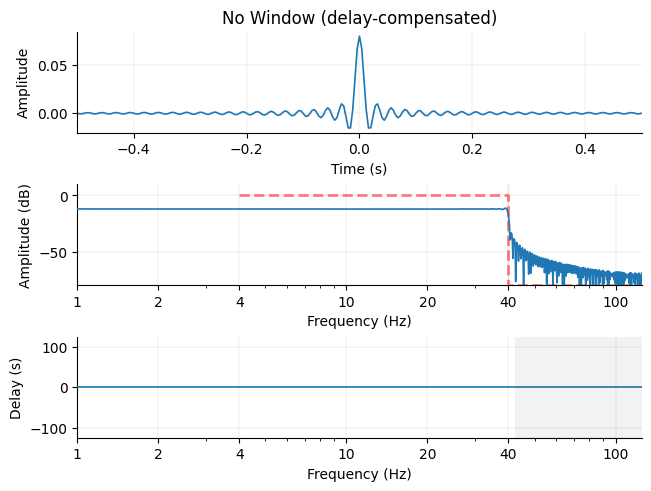

In [30]:
from mne.viz import plot_filter, plot_ideal_filter
import matplotlib.pyplot as plt

sfreq = 250
f_p = 40.
nyq = sfreq / 2.  # the Nyquist frequency is half our sample rate
freq = [0, f_p, f_p, nyq]
gain = [1, 1, 0, 0]

n = int(round(1 * sfreq))
n -= n % 2 - 1  # make it odd
t = np.arange(-(n // 2), n // 2 + 1) / sfreq  # center our sinc
h = np.sinc(2 * f_p * t) / (4 * np.pi)
flim = (1., sfreq / 2.)
fig = plot_filter(h, sfreq, freq, gain, 'No Window', flim=flim, compensate=True)

textstr = '\n'.join((
    'Pass-band Frequency: '+str(f_p),
    'Filter Length: 1s'))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
fig.text(0.7, 0.9, textstr, fontsize=14, bbox=props)

plt.show()
fig.savefig('ringing_40hz.png')

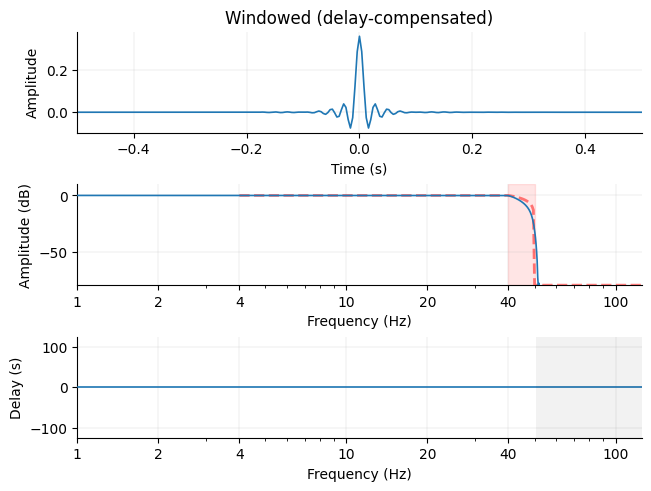

In [31]:
from scipy import signal
trans_bandwidth = 10  # 10 Hz transition band
f_s = f_p + trans_bandwidth

freq = [0., f_p, f_s, nyq]
gain = [1., 1., 0., 0.]
h = signal.firwin2(n, freq, gain, nyq=nyq)
fig = plot_filter(h, sfreq, freq, gain, 'Windowed',
                  flim=flim, compensate=True)

textstr = '\n'.join((
    'Pass-band Frequency: '+str(f_p),
    'Filter Length: 1s',
    'Transition Bandwidth: '+str(trans_bandwidth)+' Hz'))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
fig.text(0.7, 0.88, textstr, fontsize=14, bbox=props)

plt.show()
fig.savefig('no_ringing_40hz.png')

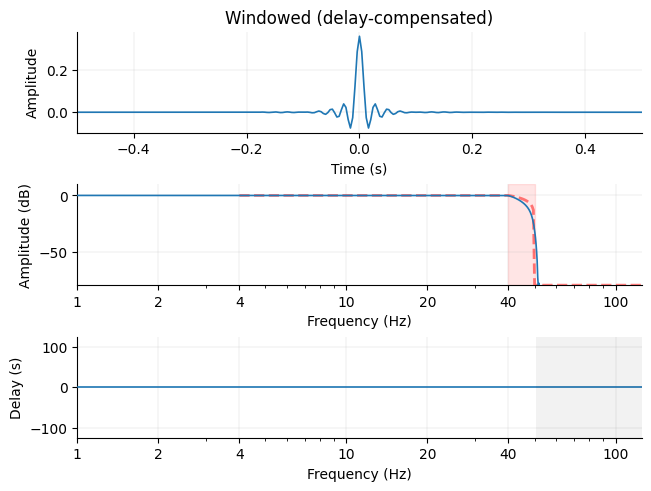

In [32]:
from scipy import signal
trans_bandwidth = 10  # 10 Hz transition band
f_s = f_p + trans_bandwidth

freq = [0., f_p, f_s, nyq]
gain = [1., 1., 0., 0.]
h = signal.firwin2(n, freq, gain, nyq=nyq)
fig = plot_filter(h, sfreq, freq, gain, 'Windowed',
                  flim=flim, compensate=True)

textstr = '\n'.join((
    'Pass-band Frequency: '+str(f_p),
    'Filter Length: 1s',
    'Transition Bandwidth: '+str(trans_bandwidth)+' Hz'))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
fig.text(0.7, 0.88, textstr, fontsize=14, bbox=props)

plt.show()
fig.savefig('no_ringing_40hz.png')

### **Feature Engineering**

# **Fourier Transform**

**Continuous Wavelet Transform**

In [40]:
from pywt import families

families(short=False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

In [41]:
from pywt import Wavelet

wavelet = Wavelet('Haar')
print(wavelet)

Wavelet haar
  Family name:    Haar
  Short name:     haar
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


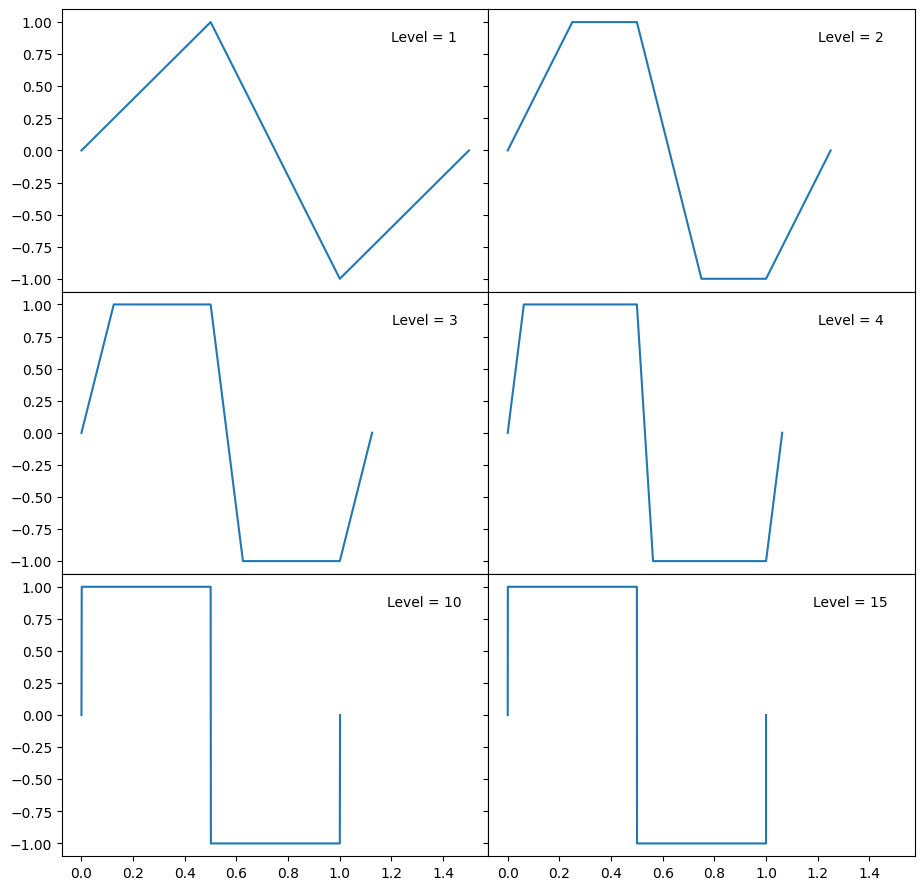

In [42]:
import matplotlib.pyplot as plt

def plot_wavelet(wavelet):

    fig, axs = plt.subplots(3,2, figsize=(11,11), squeeze =True, sharex=True, sharey=True)
    axs = axs.flatten()
    for i, level in enumerate([1, 2, 3, 4, 10, 15]):
        try:
            [psi, x] = wavelet.wavefun(level=level)
        except:
            [phi, psi, x] = wavelet.wavefun(level=level)
        axs[i].plot(x, psi)
        axs[i].text(0.85, 0.9, "Level = "+str(level), ha='center', va='center', transform=axs[i].transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

plot_wavelet(wavelet)

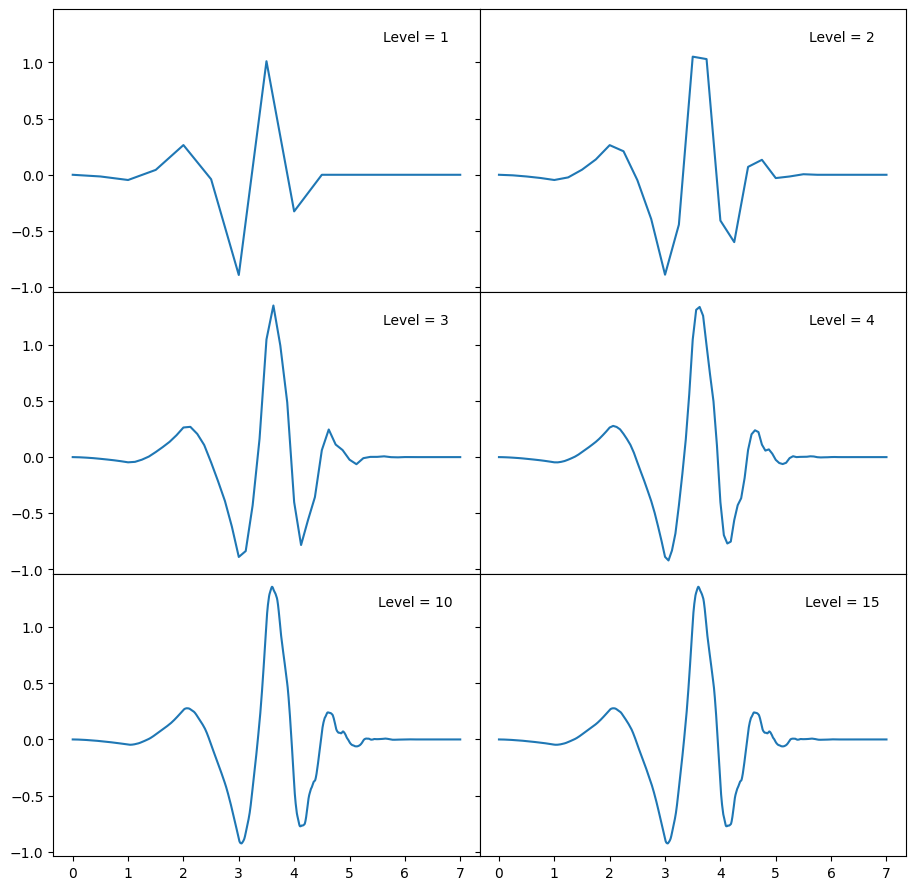

In [43]:
plot_wavelet(Wavelet('db4'))

In [46]:
from pywt import wavedec
import numpy as np
import pandas as pd

base_df = pd.DataFrame(data)

# number of levels we are interested in
level = 6

# transpose the data because its a time-series package
data_t = base_df.transpose()

# get the wavelet coefficients at each level in a list
coeffs_list = wavedec(data_t.values, wavelet='db4', level=level)

print(type(coeffs_list))
print(color.BOLD+color.UNDERLINE+'\nExample first array'+color.END)
coeffs_list[0]

<class 'list'>

Example first array


array([[5.00427998, 5.03531764, 5.0079053 , 4.99547408, 5.14840385,
        4.60854219, 3.75022352, 3.68670489, 3.98739844, 4.10930851,
        3.60704967, 4.38434373, 3.80166073, 3.85388736, 3.99150661,
        3.86543769, 3.57378191, 3.68584159, 3.92571545, 3.79228986,
        3.84170585, 5.94262513],
       [4.23431064, 4.25128331, 4.24495428, 4.20642536, 4.37129653,
        3.86073438, 3.81744912, 4.38306153, 4.2589878 , 4.24970715,
        4.32611961, 3.77867529, 4.10354357, 3.95857512, 4.15205182,
        4.05868172, 4.23398273, 4.21906317, 3.63463424, 4.58700136,
        3.88020571, 1.83108287],
       [4.77532659, 4.83736649, 4.82202993, 4.75069454, 5.08161209,
        3.86750973, 3.89158294, 4.13008565, 4.12292008, 4.41453706,
        3.87495677, 3.35494205, 4.13067282, 3.55508434, 3.72863733,
        4.43801828, 4.33036861, 4.4514822 , 4.39575724, 3.9576953 ,
        3.71205874, 2.84936298],
       [3.42207886, 3.36372557, 3.39394965, 3.40945551, 3.23583707,
        3.9654420

In [47]:
# make a list of the component names (later column rows)
nums = list(range(1,level+1))
names=[]
for num in nums:
    names.append('D' + str(num))
names.append('A' + str(nums[-1]))

# reverse the names so it counts down
names = names[::-1]

names

['A6', 'D6', 'D5', 'D4', 'D3', 'D2', 'D1']

In [49]:
# make an empty dataframe
wavelets = pd.DataFrame()

# for each array in the list of arrays
for i, array in enumerate(coeffs_list):
    # turn into a dataframe and transpose
    level_df = pd.DataFrame(array).T
    # name the column the appropriate level name
    level_df.columns = [names[i]] * level_df.shape[1] #  create a list with the same name repeated for the number of columns
    # if the wavelets df is empty...
    if wavelets.empty:
        # ... make the first level df the wavelets df
        wavelets = level_df
    # ..otherwise...
    else:
        # ... add the next levels df to another column
        wavelets = pd.concat([wavelets,level_df], axis=1)

wavelets.head()

A6        A6        A6        A6        A6        A6        A6  \
0  5.004280  4.234311  4.775327  3.422079  3.309422  1.594277  4.268812   
1  5.035318  4.251283  4.837366  3.363726  3.270215  1.504636  4.302826   
2  5.007905  4.244954  4.822030  3.393950  3.311205  1.526252  4.305423   
3  4.995474  4.206425  4.750695  3.409456  3.331635  1.660882  4.260915   
4  5.148404  4.371297  5.081612  3.235837  3.114382  0.988868  4.380038   

         A6        A6        A6  ...        D1        D1        D1        D1  \
0  3.642520  3.440263  3.594522  ...  0.085770  0.127189  0.076941 -0.052250   
1  3.614632  3.434935  3.580305  ...  0.494592  0.536321  0.208236 -0.065535   
2  3.604304  3.437164  3.602208  ...  0.416944  0.423731 -0.213391 -0.206409   
3  3.653918  3.445961  3.593718  ... -0.387274  0.055258  0.294637  0.012087   
4  3.542108  3.409190  3.635339  ...  0.743625  0.552378 -0.111101  0.226730   

         D1        D1        D1        D1        D1        D1  
0  0.176468  0.077999 -0.004547  0.078293 -0.155777  0.063507  
1  0.462900  0.160388 -0.096671  0.317097 -0.580725 -0.006238  
2 -0.021657 -0.148755  0.248600 -0.263881  0.074847 -0.187121  
3  0.433642  0.098992  0.185190  0.015346  0.314212  0.012689  
4 -0.265798 -0.454884 -0.259122  0.420439  0.005832 -0.439424  

[5 rows x 133 columns]

In [50]:
# remove the AN levels
regex = re.compile('D')
bad_items = [x for x in list(wavelets.columns) if not regex.match(x)]
decom_wavelets = wavelets.drop(bad_items, axis=1)

decom_wavelets.head()

D6        D6        D6        D6        D6        D6        D6  \
0  0.001794 -0.017131 -0.002718 -0.011147  0.020927  0.006770  0.001424   
1  0.017896 -0.050130  0.011116 -0.052691  0.050220 -0.003290  0.013909   
2  0.132717  0.149149  0.442596 -0.220635 -0.236983 -0.586999  0.297722   
3 -0.191512 -0.097814  0.336319 -0.017285 -0.054385  0.421862  0.568695   
4 -0.218465 -0.487365  0.432209 -0.183479 -0.276363  0.199364  0.082498   

         D6        D6        D6  ...        D1        D1        D1        D1  \
0  0.017451  0.011761  0.017206  ...  0.085770  0.127189  0.076941 -0.052250   
1  0.045483  0.032452  0.051308  ...  0.494592  0.536321  0.208236 -0.065535   
2 -0.274557 -0.088435 -0.103023  ...  0.416944  0.423731 -0.213391 -0.206409   
3 -0.502289 -0.239909 -0.458287  ... -0.387274  0.055258  0.294637  0.012087   
4  0.051152 -0.502211  0.389558  ...  0.743625  0.552378 -0.111101  0.226730   

         D1        D1        D1        D1        D1        D1  
0  0.176468  0.077999 -0.004547  0.078293 -0.155777  0.063507  
1  0.462900  0.160388 -0.096671  0.317097 -0.580725 -0.006238  
2 -0.021657 -0.148755  0.248600 -0.263881  0.074847 -0.187121  
3  0.433642  0.098992  0.185190  0.015346  0.314212  0.012689  
4 -0.265798 -0.454884 -0.259122  0.420439  0.005832 -0.439424  

[5 rows x 114 columns]

In [51]:
from pywt import wavedec

def wavelet_decompose_channels(data, level, output=False):
  # take every x number of points using numpy's slicing (start:stop:step)
  data = data[0::2]

  data.columns.name='channel'

  # transpose the data
  data_t = data.transpose()

  # get the wavelet coefficients at each level in a list
  coeffs_list = wavedec(data_t.values, wavelet='db4', level=level)

  # make a list of the component names (later column rows)
  nums = list(range(1,level+1))
  names=[]
  for num in nums:
    names.append('D' + str(num))
  names.append('A' + str(nums[-1]))

  # reverse the names so it counts down
  names = names[::-1]

  i = 0
  wavelets = pd.DataFrame()
  for i, array in enumerate(coeffs_list):
    # turn into a dataframe and transpose
    level_df = pd.DataFrame(array)
    level_df.index = data.columns
    level_df['level'] = names[i]
    level_df= level_df.set_index('level', append=True)
    level_df=level_df.T
    # add the next levels df to another column
    wavelets = pd.concat([wavelets,level_df], axis=1, sort=True)

  # sort values along the channels
  wavelets = wavelets.sort_values(['channel', 'level'], axis=1)

  # remove the AN levels
  regex = re.compile('D')
  bad_items = [x for x in list(wavelets.columns.levels[1]) if not regex.match(x)]
  decom_wavelets = wavelets.drop(bad_items, axis=1, level = 'level')

  decom_wavelets.index.name='sample'

  if output:
    display(decom_wavelets.head())

  return decom_wavelets

example_wavelets = wavelet_decompose_channels(seiz_df, level=5, output=True)

channel       ch1                                              ch10            \
level          D1        D2        D3        D4        D5        D1        D2   
sample                                                                          
0       -0.050944  0.077472 -0.110834 -0.004381  0.015376 -0.086748 -0.283494   
1       -0.155683  0.232883 -0.355550  0.002836  0.062096  0.024908 -0.917844   
2       -0.055514 -0.029974  0.038870  0.275317  0.112035  0.504634  0.071250   
3       -0.545350  0.382764 -0.330324  0.386856  0.084909 -0.224146 -0.097107   
4       -0.169397 -0.089731  0.069844 -0.144870  0.057515 -0.263459  0.153386   

channel                                ...       ch8                      \
level          D3        D4        D5  ...        D1        D2        D3   
sample                                 ...                                 
0        0.078218  0.032720 -0.030982  ...  0.179199 -0.010853  0.077336   
1        0.276119  0.109139 -0.089979  ...  0.381348 -0.022145  0.246567   
2        0.214353  0.169840  0.140238  ... -0.426509  0.042794 -0.023687   
3       -0.239929  0.320254 -0.375532  ...  0.425678 -0.307366 -0.135092   
4       -0.058988  0.130431  0.280687  ...  0.607367 -0.100031 -0.228440   

channel                           ch9                                          
level          D4        D5        D1        D2        D3        D4        D5  
sample                                                                         
0       -0.003173 -0.008936  0.151265 -0.070258  0.111428  0.007092 -0.015423  
1       -0.014710 -0.033071  0.617158 -0.220966  0.360128  0.013698 -0.050774  
2       -0.036132 -0.088344  0.388375  0.053641 -0.039968 -0.014360 -0.009325  
3        0.248487 -0.618685 -0.066140 -0.189542 -0.341560  0.209376 -0.190411  
4        0.287062 -0.141910  0.128490  0.071723 -0.018921  0.316564 -0.687624  

[5 rows x 95 columns]

## Log Sum

In [57]:
import pandas as pd
from pywt import wavedec
import numpy as np

def minus_small(x):
    '''Takes a pandas series and subtracts the smallest number (other than 0)
    '''
    # drop 0s
    no_zeros = x[x!=0]
    # subtract the minimum value
    result = no_zeros - no_zeros.min()
    return result

def reformat(data, feature_name):
    data.index = [feature_name+level for level in data.index]
    data.index.name = 'feature'
    data = pd.DataFrame(data.unstack()).T

    return data

def log_sum_channels(data, output=False):
    absolute_sums = data.sum()
    # make the columns channels
    absolute_sums = absolute_sums.unstack('channel')
    # for each channel apply the minus small function
    absolute_sums_minus = absolute_sums.apply(minus_small) # Now using the defined 'minus_small' function
    # find the log of each channel
    absolute_sums_log = absolute_sums_minus.apply(np.log)
    # reformat the df for later combination with other features
    absolute_sums_log = reformat(absolute_sums_log, 'LSWT_')

    if output:
        display(absolute_sums_log.head())

    return absolute_sums_log

# Assuming 'example_wavelets' is already defined from previous code
example_absolute_sums_log = log_sum_channels(example_wavelets, output=True)


channel     ch1                                             ch10          \
feature LSWT_D1  LSWT_D2   LSWT_D3   LSWT_D4   LSWT_D5   LSWT_D1 LSWT_D2   
0          -inf  1.82602  0.949199  2.117507  1.899651  0.918983    -inf   

channel                                ...       ch8                    \
feature   LSWT_D3   LSWT_D4   LSWT_D5  ...   LSWT_D1 LSWT_D2   LSWT_D3   
0        0.212848  0.762876 -0.506824  ... -0.311502    -inf  0.380242   

channel                           ch9                                        
feature   LSWT_D4   LSWT_D5   LSWT_D1   LSWT_D2   LSWT_D3 LSWT_D4   LSWT_D5  
0        1.658493  0.766535 -1.331913  1.084947  0.657591    -inf -0.355489  

[1 rows x 95 columns]

Average power of the wavelet coefficients in each sub-band

In [59]:
from pywt import wavedec

def ave(data, output=False):
    # get the mean
    mean_data = data.mean()

    # Convert the MultiIndex to a simple Index before adding '_mean'
    mean_data.index = [str(level) + '_mean' for level in mean_data.index]

    if output:
        display(mean_data)

    return mean_data

# Assuming 'example_wavelets' is already defined from previous code,
# and you intend to use that as a substitute for baseline_wavelets
baseline_wavelets = example_wavelets

print(color.BOLD+color.UNDERLINE+'Baseline Mean Wavelets'+color.END)
baseline_mean = ave(baseline_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Mean Wavelets'+color.END)

# Call wavelet_decompose_channels to create seizure_wavelets
seizure_wavelets = wavelet_decompose_channels(seiz_df, level=5) # Assuming seiz_df is defined somewhere

seizure_mean = ave(seizure_wavelets, output=True)

Baseline Mean Wavelets


('ch1', 'D1')_mean   -0.023612
('ch1', 'D2')_mean    0.001810
('ch1', 'D3')_mean   -0.049855
('ch1', 'D4')_mean    0.063152
('ch1', 'D5')_mean    0.032263
                        ...   
('ch9', 'D1')_mean   -0.008049
('ch9', 'D2')_mean    0.005068
('ch9', 'D3')_mean   -0.005446
('ch9', 'D4')_mean   -0.062174
('ch9', 'D5')_mean   -0.072710
Length: 95, dtype: float64


Seizure Mean Wavelets


('ch1', 'D1')_mean   -0.023612
('ch1', 'D2')_mean    0.001810
('ch1', 'D3')_mean   -0.049855
('ch1', 'D4')_mean    0.063152
('ch1', 'D5')_mean    0.032263
                        ...   
('ch9', 'D1')_mean   -0.008049
('ch9', 'D2')_mean    0.005068
('ch9', 'D3')_mean   -0.005446
('ch9', 'D4')_mean   -0.062174
('ch9', 'D5')_mean   -0.072710
Length: 95, dtype: float64

In [60]:
def ave_channels(data, output=False):
  # get the mean
  mean_data = data.mean()

  mean_data = mean_data.unstack('channel')

  mean_data = reformat(mean_data, 'Mean_')

  if output:
      display(mean_data.head())

  return mean_data

example_wavelet_mean = ave_channels(example_wavelets, output=True)

channel       ch1                                             ch10            \
feature   Mean_D1  Mean_D2   Mean_D3   Mean_D4   Mean_D5   Mean_D1   Mean_D2   
0       -0.023612  0.00181 -0.049855  0.063152  0.032263  0.011125  0.002368   

channel                                ...       ch8                     \
feature   Mean_D3   Mean_D4   Mean_D5  ...   Mean_D1   Mean_D2  Mean_D3   
0        0.022721  0.066277  0.041373  ... -0.011068 -0.027174 -0.03044   

channel                          ch9                                         
feature   Mean_D4  Mean_D5   Mean_D1   Mean_D2   Mean_D3   Mean_D4  Mean_D5  
0        0.046454 -0.06274 -0.008049  0.005068 -0.005446 -0.062174 -0.07271  

[1 rows x 95 columns]

Mean of the absolute values of the coefficients in each sub-band

In [66]:
from pywt import wavedec

def mean_abs(data, output=False):
    # get the mean of the absolute values
    mean_abs_data = data.abs().mean()

    # Convert the MultiIndex to a simple Index before adding '_mean_abs'
    mean_abs_data.index = [str(level) + '_mean_abs' for level in mean_abs_data.index]

    if output:
        display(mean_abs_data)

    return mean_abs_data

# Assuming 'example_wavelets' is already defined from previous code,
# and you intend to use that as a substitute for baseline_wavelets
baseline_wavelets = example_wavelets

print(color.BOLD+color.UNDERLINE+'Baseline Mean Absolute Wavelets'+color.END)
baseline_mean_abs = mean_abs(baseline_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Mean Absolute Wavelets'+color.END)
seizure_mean_abs = mean_abs(seizure_wavelets, output=True)

# Call wavelet_decompose_channels to create seizure_wavelets
seizure_wavelets = wavelet_decompose_channels(seiz_df, level=5) # Assuming seiz_df is defined somewhere

seizure_mean = ave(seizure_wavelets, output=True)

Baseline Mean Absolute Wavelets


('ch1', 'D1')_mean_abs    0.223929
('ch1', 'D2')_mean_abs    0.237091
('ch1', 'D3')_mean_abs    0.225413
('ch1', 'D4')_mean_abs    0.223710
('ch1', 'D5')_mean_abs    0.182279
                            ...   
('ch9', 'D1')_mean_abs    0.224210
('ch9', 'D2')_mean_abs    0.246691
('ch9', 'D3')_mean_abs    0.222647
('ch9', 'D4')_mean_abs    0.209536
('ch9', 'D5')_mean_abs    0.264216
Length: 95, dtype: float64


Seizure Mean Absolute Wavelets


('ch1', 'D1')_mean_abs    0.223929
('ch1', 'D2')_mean_abs    0.237091
('ch1', 'D3')_mean_abs    0.225413
('ch1', 'D4')_mean_abs    0.223710
('ch1', 'D5')_mean_abs    0.182279
                            ...   
('ch9', 'D1')_mean_abs    0.224210
('ch9', 'D2')_mean_abs    0.246691
('ch9', 'D3')_mean_abs    0.222647
('ch9', 'D4')_mean_abs    0.209536
('ch9', 'D5')_mean_abs    0.264216
Length: 95, dtype: float64

('ch1', 'D1')_mean   -0.023612
('ch1', 'D2')_mean    0.001810
('ch1', 'D3')_mean   -0.049855
('ch1', 'D4')_mean    0.063152
('ch1', 'D5')_mean    0.032263
                        ...   
('ch9', 'D1')_mean   -0.008049
('ch9', 'D2')_mean    0.005068
('ch9', 'D3')_mean   -0.005446
('ch9', 'D4')_mean   -0.062174
('ch9', 'D5')_mean   -0.072710
Length: 95, dtype: float64

In [67]:
def mean_abs_channels(data, output=False):
  # get the mean of the absolute values
  mean_abs_data = data.abs().mean()

  mean_abs_data = mean_abs_data.unstack('channel')

  mean_abs_data = reformat(mean_abs_data, 'Mean_Abs_')

  if output:
    display(mean_abs_data.head())

  return mean_abs_data


example_mean_abs = mean_abs_channels(example_wavelets, output=True)

channel         ch1                                                  \
feature Mean_Abs_D1 Mean_Abs_D2 Mean_Abs_D3 Mean_Abs_D4 Mean_Abs_D5   
0          0.223929    0.237091    0.225413     0.22371    0.182279   

channel        ch10                                                  ...  \
feature Mean_Abs_D1 Mean_Abs_D2 Mean_Abs_D3 Mean_Abs_D4 Mean_Abs_D5  ...   
0          0.248826    0.220893     0.26818    0.191879    0.205432  ...   

channel         ch8                                                  \
feature Mean_Abs_D1 Mean_Abs_D2 Mean_Abs_D3 Mean_Abs_D4 Mean_Abs_D5   
0          0.229946    0.210985    0.202878    0.243689    0.305384   

channel         ch9                                                  
feature Mean_Abs_D1 Mean_Abs_D2 Mean_Abs_D3 Mean_Abs_D4 Mean_Abs_D5  
0           0.22421    0.246691    0.222647    0.209536    0.264216  

[1 rows x 95 columns]

Standard deviation of the coefficients in each sub-band

In [70]:
from pywt import wavedec

def mean_abs(data, output=False):
    # get the mean of the absolute values
    mean_abs_data = data.abs().mean()

    # Convert the MultiIndex to a simple Index before adding '_mean_abs'
    mean_abs_data.index = [str(level) + '_std' for level in mean_abs_data.index]

    if output:
        display(mean_abs_data)

    return mean_abs_data

# Assuming 'example_wavelets' is already defined from previous code,
# and you intend to use that as a substitute for baseline_wavelets
baseline_wavelets = example_wavelets

print(color.BOLD+color.UNDERLINE+'Baseline Mean Absolute Wavelets'+color.END)
baseline_mean_abs = mean_abs(baseline_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Mean Absolute Wavelets'+color.END)
seizure_mean_abs = mean_abs(seizure_wavelets, output=True)

# Call wavelet_decompose_channels to create seizure_wavelets
seizure_wavelets = wavelet_decompose_channels(seiz_df, level=5) # Assuming seiz_df is defined somewhere

seizure_mean = ave(seizure_wavelets, output=True)

Baseline Mean Absolute Wavelets


('ch1', 'D1')_std    0.223929
('ch1', 'D2')_std    0.237091
('ch1', 'D3')_std    0.225413
('ch1', 'D4')_std    0.223710
('ch1', 'D5')_std    0.182279
                       ...   
('ch9', 'D1')_std    0.224210
('ch9', 'D2')_std    0.246691
('ch9', 'D3')_std    0.222647
('ch9', 'D4')_std    0.209536
('ch9', 'D5')_std    0.264216
Length: 95, dtype: float64


Seizure Mean Absolute Wavelets


('ch1', 'D1')_std    0.223929
('ch1', 'D2')_std    0.237091
('ch1', 'D3')_std    0.225413
('ch1', 'D4')_std    0.223710
('ch1', 'D5')_std    0.182279
                       ...   
('ch9', 'D1')_std    0.224210
('ch9', 'D2')_std    0.246691
('ch9', 'D3')_std    0.222647
('ch9', 'D4')_std    0.209536
('ch9', 'D5')_std    0.264216
Length: 95, dtype: float64

('ch1', 'D1')_mean   -0.023612
('ch1', 'D2')_mean    0.001810
('ch1', 'D3')_mean   -0.049855
('ch1', 'D4')_mean    0.063152
('ch1', 'D5')_mean    0.032263
                        ...   
('ch9', 'D1')_mean   -0.008049
('ch9', 'D2')_mean    0.005068
('ch9', 'D3')_mean   -0.005446
('ch9', 'D4')_mean   -0.062174
('ch9', 'D5')_mean   -0.072710
Length: 95, dtype: float64

In [71]:
def coeff_std_channels(data, output=False):
  # get the standard deviation of the coeficients
  std_data = data.std()

  std_data = std_data.unstack('channel')

  std_data = reformat(std_data, 'STD_')

  if output:
    display(std_data.head())

  return std_data


example_std = coeff_std_channels(example_wavelets, output=True)

channel       ch1                                              ch10            \
feature    STD_D1    STD_D2    STD_D3    STD_D4    STD_D5    STD_D1    STD_D2   
0        0.277806  0.288572  0.273282  0.265016  0.247047  0.302306  0.284173   

channel                                ...       ch8                      \
feature    STD_D3    STD_D4    STD_D5  ...    STD_D1    STD_D2    STD_D3   
0        0.325837  0.228009  0.235747  ...  0.281887  0.257251  0.253061   

channel                           ch9                                          
feature    STD_D4    STD_D5    STD_D1    STD_D2    STD_D3    STD_D4    STD_D5  
0        0.297398  0.369898  0.277092  0.310422  0.279787  0.264825  0.345689  

[1 rows x 95 columns]

Ratio of the absolute mean values of adjacent sub-bands

In [73]:
def ratio(data, output=False):
    # get the mean of the absolute values
    data = data.abs().mean()
    # get a list of the index
    decimation_levels = list(data.index)

    ratio_data=pd.Series(index=data.index)
    for level_no in range(0, len(decimation_levels)):
        # for the first decimation
        if level_no == 0:
            ratio_data.loc[decimation_levels[level_no]] = \
            data.loc[decimation_levels[level_no]]/data.loc[decimation_levels[level_no+1]]

        #for the last decimation
        elif level_no == len(decimation_levels)-1:
            ratio_data.loc[decimation_levels[level_no]] = \
            data.loc[decimation_levels[level_no]]/data.loc[decimation_levels[level_no-1]]
        else:
            before = data.loc[decimation_levels[level_no-1]]
            after = data.loc[decimation_levels[level_no+1]]
            mean_data = (before+after)/2

            ratio_data.loc[decimation_levels[level_no]] = \
            data.loc[decimation_levels[level_no]]/mean_data

    ratio_data.index = [str(level) + '_Ratio' for level in ratio_data.index]

    if output:
        display(ratio_data)

    return ratio_data


print(color.BOLD+color.UNDERLINE+'Baseline Ratio Wavelets'+color.END)
baseline_ratio = ratio(baseline_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Ratio Wavelets'+color.END)
seizure_ratio = ratio(seizure_wavelets, output=True)


Baseline Ratio Wavelets


('ch1', 'D1')_Ratio    0.944488
('ch1', 'D2')_Ratio    1.055278
('ch1', 'D3')_Ratio    0.978353
('ch1', 'D4')_Ratio    1.097449
('ch1', 'D5')_Ratio    0.771490
                         ...   
('ch9', 'D1')_Ratio    0.812246
('ch9', 'D2')_Ratio    1.104115
('ch9', 'D3')_Ratio    0.976037
('ch9', 'D4')_Ratio    0.860757
('ch9', 'D5')_Ratio    1.260962
Length: 95, dtype: float64


Seizure Ratio Wavelets


('ch1', 'D1')_Ratio    0.944488
('ch1', 'D2')_Ratio    1.055278
('ch1', 'D3')_Ratio    0.978353
('ch1', 'D4')_Ratio    1.097449
('ch1', 'D5')_Ratio    0.771490
                         ...   
('ch9', 'D1')_Ratio    0.812246
('ch9', 'D2')_Ratio    1.104115
('ch9', 'D3')_Ratio    0.976037
('ch9', 'D4')_Ratio    0.860757
('ch9', 'D5')_Ratio    1.260962
Length: 95, dtype: float64

In [74]:
def ratio_channels(epoch_data):

  decimation_levels = list(epoch_data.index)

  ratio_data=pd.Series()
  for level_no in range(0, len(decimation_levels)):
    # for the first decimation
    if level_no == 0:
      ratio_data[decimation_levels[level_no]] = \
      epoch_data.loc[decimation_levels[level_no]]/epoch_data.loc[decimation_levels[level_no+1]]
    #for the last decimation
    elif level_no == len(decimation_levels)-1:
      ratio_data[decimation_levels[level_no]] = \
      epoch_data.loc[decimation_levels[level_no]]/epoch_data.loc[decimation_levels[level_no-1]]
    else:
      before = epoch_data.loc[decimation_levels[level_no-1]]
      after = epoch_data.loc[decimation_levels[level_no+1]]
      mean_data = (before+after)/2

      ratio_data[decimation_levels[level_no]] = \
      epoch_data.loc[decimation_levels[level_no]]/mean_data

  #name the index column
  ratio_data.index.name = 'features'

  return ratio_data

# get the ratio
example_ratio_data = example_wavelets.mean().unstack('channel').apply(ratio_channels)
example_ratio_data = reformat(example_ratio_data, 'Ratio_Mean_')
display(example_ratio_data.head())

channel           ch1                                                          \
feature Ratio_Mean_D1 Ratio_Mean_D2 Ratio_Mean_D3 Ratio_Mean_D4 Ratio_Mean_D5   
0          -13.043026     -0.049282       -1.5349     -7.179438      0.510877   

channel          ch10                                                          \
feature Ratio_Mean_D1 Ratio_Mean_D2 Ratio_Mean_D3 Ratio_Mean_D4 Ratio_Mean_D5   
0            4.698476      0.139914      0.661979      2.068118      0.624249   

channel  ...           ch8                                            \
feature  ... Ratio_Mean_D1 Ratio_Mean_D2 Ratio_Mean_D3 Ratio_Mean_D4   
0        ...       0.40731      1.309308     -3.157644     -0.997076   

channel                         ch9                                            \
feature Ratio_Mean_D5 Ratio_Mean_D1 Ratio_Mean_D2 Ratio_Mean_D3 Ratio_Mean_D4   
0           -1.350588     -1.588263     -0.751091      0.190722      1.591039   

channel                
feature Ratio_Mean_D5  
0            1.169453  

[1 rows x 95 columns]

## **Scaling**

In [77]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

mms = MinMaxScaler()
wav_mms = mms.fit_transform(seizure_wavelets)

sc = StandardScaler()
wav_scale = sc.fit_transform(seizure_wavelets)

print(color.BOLD+color.UNDERLINE+'Before Scaling'+color.END)
display(seizure_wavelets.head())
print(color.BOLD+color.UNDERLINE+'After MinMaxScaler'+color.END)
display(pd.DataFrame(wav_mms).head())
print(color.BOLD+color.UNDERLINE+'After StandardScaler'+color.END)
display(pd.DataFrame(wav_scale).head())

Before Scaling


channel       ch1                                              ch10            \
level          D1        D2        D3        D4        D5        D1        D2   
sample                                                                          
0       -0.050944  0.077472 -0.110834 -0.004381  0.015376 -0.086748 -0.283494   
1       -0.155683  0.232883 -0.355550  0.002836  0.062096  0.024908 -0.917844   
2       -0.055514 -0.029974  0.038870  0.275317  0.112035  0.504634  0.071250   
3       -0.545350  0.382764 -0.330324  0.386856  0.084909 -0.224146 -0.097107   
4       -0.169397 -0.089731  0.069844 -0.144870  0.057515 -0.263459  0.153386   

channel                                ...       ch8                      \
level          D3        D4        D5  ...        D1        D2        D3   
sample                                 ...                                 
0        0.078218  0.032720 -0.030982  ...  0.179199 -0.010853  0.077336   
1        0.276119  0.109139 -0.089979  ...  0.381348 -0.022145  0.246567   
2        0.214353  0.169840  0.140238  ... -0.426509  0.042794 -0.023687   
3       -0.239929  0.320254 -0.375532  ...  0.425678 -0.307366 -0.135092   
4       -0.058988  0.130431  0.280687  ...  0.607367 -0.100031 -0.228440   

channel                           ch9                                          
level          D4        D5        D1        D2        D3        D4        D5  
sample                                                                         
0       -0.003173 -0.008936  0.151265 -0.070258  0.111428  0.007092 -0.015423  
1       -0.014710 -0.033071  0.617158 -0.220966  0.360128  0.013698 -0.050774  
2       -0.036132 -0.088344  0.388375  0.053641 -0.039968 -0.014360 -0.009325  
3        0.248487 -0.618685 -0.066140 -0.189542 -0.341560  0.209376 -0.190411  
4        0.287062 -0.141910  0.128490  0.071723 -0.018921  0.316564 -0.687624  

[5 rows x 95 columns]

After MinMaxScaler


0         1         2         3         4         5         6   \
0  0.429776  0.580076  0.330414  0.527319  0.400487  0.417396  0.399403   
1  0.356507  0.685719  0.129113  0.534553  0.444293  0.492889  0.000000   
2  0.426579  0.507037  0.453560  0.807667  0.491119  0.817243  0.622759   
3  0.083916  0.787603  0.149864  0.919466  0.465684  0.324498  0.516757   
4  0.346913  0.466417  0.479039  0.386503  0.439998  0.297917  0.674474   

         7         8         9   ...        85        86        87        88  \
0  0.620182  0.430670  0.441425  ...  0.679796  0.550958  0.596516  0.401181   
1  0.769055  0.521349  0.365840  ...  0.830973  0.541247  0.748466  0.391139   
2  0.722591  0.593376  0.660785  ...  0.226819  0.597092  0.505809  0.372495   
3  0.380852  0.771856  0.000000  ...  0.864125  0.295974  0.405780  0.620213   
4  0.516967  0.546614  0.840723  ...  1.000000  0.474270  0.321964  0.653787   

         89        90        91        92        93        94  
0  0.587707  0.590520  0.397042  0.537886  0.585419  0.506702  
1  0.567562  0.925494  0.297468  0.718735  0.591656  0.480055  
2  0.521430  0.761001  0.478902  0.427794  0.565170  0.511299  
3  0.078789  0.434207  0.318230  0.208482  0.776372  0.374797  
4  0.476722  0.574145  0.490849  0.443099  0.877555  0.000000  

[5 rows x 95 columns]

After StandardScaler


0         1         2         3         4         5         6   \
0 -0.098583  0.263209 -0.224795 -0.258341 -0.069961 -0.324395 -1.009832   
1 -0.476350  0.803845 -1.126922 -0.230732  0.123601  0.045685 -3.250733   
2 -0.115065 -0.110570  0.327081  0.811620  0.330501  1.635718  0.243333   
3 -1.881793  1.325243 -1.033928  1.238301  0.218115 -0.779797 -0.351404   
4 -0.525815 -0.318450  0.441263 -0.795768  0.104620 -0.910099  0.533484   

         7         8         9   ...        85        86        87        88  \
0  0.171589 -0.149203 -0.314140  ...  0.676315  0.063687  0.429056 -0.169173   
1  0.783466  0.190579 -0.570287  ...  1.394862  0.019623  1.102765 -0.208503   
2  0.592496  0.460472  0.429236  ... -1.476706  0.273035  0.026885 -0.281527   
3 -0.812068  1.129252 -1.810061  ...  1.552436 -1.093390 -0.416617  0.688704   
4 -0.252629  0.285250  1.039018  ...  2.198257 -0.284312 -0.788236  0.820202   

         89        90        91        92        93        94  
0  0.148882  0.576089 -0.243594  0.420831  0.265161  0.169617  
1  0.082097  2.260785 -0.730967  1.316329  0.290452  0.064949  
2 -0.070847  1.433494  0.157080 -0.124306  0.183041  0.187673  
3 -1.538336 -0.210058 -0.629344 -1.210255  1.039539 -0.348496  
4 -0.219067  0.493735  0.215554 -0.048520  1.449871 -1.820668  

[5 rows x 95 columns]

In [78]:
# get the shape of this data
orig_shape = seizure_wavelets.shape
# reshape to merge the levels and data
data_reshape = np.reshape(seizure_wavelets.values, (orig_shape[0], -1))
# scale across channels
SS = StandardScaler()
data_scaled = SS.fit_transform(data_reshape.T).T
# shape the data back to channels, levels, data
data_scaled = np.reshape(data_scaled, orig_shape)

pd.DataFrame(data_scaled, columns = seizure_wavelets.columns).head()

channel       ch1                                              ch10            \
level          D1        D2        D3        D4        D5        D1        D2   
0       -0.571312  0.845977 -1.232295 -0.057412  0.160647 -0.966463 -3.137878   
1       -0.578382  0.819026 -1.297168 -0.008298  0.204819  0.071080 -3.319360   
2       -0.401686 -0.302094 -0.033643  0.888357  0.251654  1.782552  0.092619   
3       -2.037747  1.411416 -1.238640  1.426624  0.304492 -0.844052 -0.371935   
4       -0.720179 -0.424371  0.168147 -0.629107  0.122366 -1.069440  0.478343   

channel                                ...       ch8                      \
level          D3        D4        D5  ...        D1        D2        D3   
0        0.854209  0.352063 -0.350991  ...  1.968704 -0.128840  0.844471   
1        0.974515  0.374003 -0.342091  ...  1.352951 -0.098139  0.868237   
2        0.650634  0.477060  0.361628  ... -1.848341 -0.018342 -0.277579   
3       -0.902706  1.179108 -1.406650  ...  1.570898 -1.153322 -0.513098   
4       -0.310219  0.393113  0.951024  ...  2.164016 -0.462617 -0.939411   

channel                           ch9                                          
level          D4        D5        D1        D2        D3        D4        D5  
0       -0.044075 -0.107675  1.660400 -0.784466  1.220740  0.069212 -0.179278  
1       -0.071401 -0.137431  2.201000 -0.813162  1.276638  0.030766 -0.201096  
2       -0.326108 -0.529702  1.329214  0.023954 -0.341066 -0.241208 -0.221576  
3        0.912400 -2.310281 -0.256851 -0.715451 -1.280400  0.767053 -0.718682  
4        0.974696 -0.618115  0.385905  0.175122 -0.161445  1.084240 -2.644400  

[5 rows x 95 columns]

## **Supervised Learning**

In [79]:
import os                         # for file locations
import matplotlib.pyplot as plt   # for plotting
import numpy as np                # arrays
import pickle                     # saving python objects
import pandas as pd               # dataframes

RANDOM_STATE = 0

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# **Load Data**

In [80]:
import gdown
FILE_PATH = 'Epil_features.json.gzip'

if not os.path.exists(FILE_PATH):
    gdown.download('https://drive.google.com/uc?id=143dJfY1_U-p8elbvSzwe0TTHGcDo3PYv',
                './'+FILE_PATH, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=143dJfY1_U-p8elbvSzwe0TTHGcDo3PYv
To: /content/Epil_features.json.gzip
100%|██████████| 151k/151k [00:00<00:00, 51.1MB/s]


In [81]:
import numpy as np
import pickle           # saving python objects
import pandas as pd     # dataframes

# load features dataframe
feature_df = pd.read_json(FILE_PATH, orient='index', compression = 'gzip')

# display examples of the data
display(feature_df.info())
display(feature_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 500 non-null    object 
 1   location              500 non-null    object 
 2   file_id               500 non-null    object 
 3   CZ|2_4Hz              500 non-null    float64
 4   CZ|4_8Hz              500 non-null    float64
 5   CZ|8_12Hz             500 non-null    float64
 6   CZ|12_30Hz            500 non-null    float64
 7   CZ|30_70Hz            500 non-null    float64
 8   CZ|Ratio_3_12/2_30Hz  500 non-null    float64
 9   CZ|D6_mean            500 non-null    float64
 10  CZ|D5_mean            500 non-null    float64
 11  CZ|D4_mean            500 non-null    float64
 12  CZ|D3_mean            500 non-null    float64
 13  CZ|D2_mean            500 non-null    float64
 14  CZ|D1_mean            500 non-null    float64
 15  CZ|D6_std             500 no

None

class                         location file_id     CZ|2_4Hz    CZ|4_8Hz  \
0  baseline  intracranial epileptogenic zone    F001    77.429564   28.734279   
1  baseline  intracranial epileptogenic zone    F002  1060.585071  480.018796   
2  baseline  intracranial epileptogenic zone    F003   316.076591  186.372298   
3  baseline  intracranial epileptogenic zone    F004   213.966621   91.338657   
4  baseline  intracranial epileptogenic zone    F005   973.296659  385.347164   

    CZ|8_12Hz  CZ|12_30Hz  CZ|30_70Hz  CZ|Ratio_3_12/2_30Hz  CZ|D6_mean  ...  \
0   13.102026    2.467909    0.462172              0.138219   -1.758529  ...   
1  201.886582   29.713494    4.070126              0.140057  -43.528777  ...   
2  135.970946   20.841888    2.781560              0.148809    7.140095  ...   
3   34.191639    3.157286    0.573759              0.064002  -15.857898  ...   
4  218.880920   47.891201    7.560384              0.183348  -21.433089  ...   

   CZ|D4_mean_abs  CZ|D3_mean_abs  CZ|D2_mean_abs  CZ|D1_mean_abs  CZ|D6_LSWT  \
0       28.409123       14.772764        5.266416        1.910710    0.000000   
1       81.999218       31.116812        8.462824        1.761159    0.000000   
2       87.018413       39.403208       10.376156        2.179047    7.534104   
3       45.580184       17.377872        4.953816        1.812019    0.000000   
4      113.995056       52.705751       17.566081        3.478807    8.055723   

   CZ|D5_LSWT  CZ|D4_LSWT  CZ|D3_LSWT  CZ|D2_LSWT  CZ|D1_LSWT  
0    6.427250    5.613190    5.805773    4.749819    3.665018  
1    8.241056    7.388935    7.770027    8.062119    8.020356  
2    0.000000    7.412203    6.336933    7.197397    7.170449  
3    6.422032    7.582963    6.947882    7.086014    6.950912  
4    0.000000    8.726303    8.031105    8.460379    8.480473  

[5 rows x 39 columns]

## **Channel Selection**

In [82]:
feature_df['location'].unique()

array(['intracranial epileptogenic zone', 'intracranial hippocampus',
       'surface'], dtype=object)

In [83]:
# select only intracranial EEG
feature_reduced = feature_df[feature_df.location != 'surface']
feature_reduced['location'].unique()

array(['intracranial epileptogenic zone', 'intracranial hippocampus'],
      dtype=object)

Splitting Data

In [84]:
import sklearn
sklearn.__version__

'1.3.2'

# **Datax**

In [85]:
feature_df_drop = feature_df.drop(['class', 'file_id', 'location'], axis='columns')
data_x = feature_df_drop.values

data_x

array([[  77.42956361,   28.73427904,   13.10202554, ...,    5.80577268,
           4.74981903,    3.66501809],
       [1060.58507118,  480.01879575,  201.886582  , ...,    7.77002745,
           8.0621192 ,    8.02035555],
       [ 316.07659124,  186.37229784,  135.97094565, ...,    6.33693273,
           7.19739712,    7.17044911],
       ...,
       [  81.55428714,   49.70403992,   75.17451777, ...,    6.57245791,
           5.42744447,    6.1220055 ],
       [  89.63214378,   96.72602516,   93.09894163, ...,    0.        ,
           5.31796381,    4.56826703],
       [ 111.93187763,   61.40272274,   76.48485277, ...,    0.        ,
           5.6456761 ,    6.2556254 ]])

## Datay

In [86]:
display(feature_df['class'].value_counts())

class
baseline    400
seizure     100
Name: count, dtype: int64

In [87]:
from sklearn.preprocessing import LabelEncoder

# create condition(group) array
class_series = feature_df['class']

# make a label encoder
le = LabelEncoder()
# change the string labels to ints
data_y = le.fit_transform(class_series)

# get the unique labels
labels = list(class_series.unique())
# print out the labels and their new codes
for i, code in enumerate(list(le.transform(labels))):
    print(labels[i] + ': ' + str(code))

data_y[:5]

baseline: 0
seizure: 1


array([0, 0, 0, 0, 0])

In [88]:
feature_df['location'].value_counts()

location
intracranial epileptogenic zone    200
surface                            200
intracranial hippocampus           100
Name: count, dtype: int64

In [89]:
from sklearn.preprocessing import LabelBinarizer

# create condition(group) array
location_series = feature_df['location']

# make a label encoder
lb = LabelBinarizer()
# change the string labels to ints
data_y = lb.fit_transform(location_series)

# get the unique labels
labels = list(location_series.unique())
# print out the labels and their new codes
for i, code in enumerate(list(lb.transform(labels))):
    print(labels[i] + ': ' + str(code))

data_y[:5]

intracranial epileptogenic zone: [1 0 0]
intracranial hippocampus: [0 1 0]
surface: [0 0 1]


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [90]:
one_hot_y = pd.get_dummies(location_series.unique())
dummy_y = pd.get_dummies(location_series.unique(), drop_first=True)

print(color.BOLD+color.UNDERLINE+'Onehot'+color.END)
display(one_hot_y.head())
print(color.BOLD+color.UNDERLINE+'Dummy'+color.END)
display(dummy_y.head())

Onehot


intracranial epileptogenic zone  intracranial hippocampus  surface
0                             True                     False    False
1                            False                      True    False
2                            False                     False     True

Dummy


intracranial hippocampus  surface
0                     False    False
1                      True    False
2                     False     True

### Training and Test Data

In [91]:
# select only intracranial EEG
feature_reduced = feature_df[feature_df.location != 'surface']
# drop the columns which are not feature variables
feature_reduced_drop = feature_reduced.drop(['class', 'file_id', 'location'], axis='columns')
# change to an array
data_x = feature_reduced_drop.values
# change the string labels to ints
data_y = le.fit_transform(feature_reduced['class'])

print(color.BOLD+'Feature DataFrame'+color.END)
display(data_x.shape)
print(color.BOLD+'Target DataFrame'+color.END)
display(data_y.shape)

Feature DataFrame


(300, 36)

Target DataFrame


(300,)

In [92]:
from sklearn.model_selection import train_test_split
TEST_SIZE = 0.1

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=TEST_SIZE,
                                                  random_state=RANDOM_STATE)

print(color.BOLD+color.UNDERLINE+'Feature DataFrame'+color.END)
print('Training size: ' + str(X_train.shape))
print('Validation size: ' + str(X_val.shape))
print('Test size: ' + str(X_test.shape))
print(color.BOLD+color.UNDERLINE+'\nTarget DataFrame'+color.END)
print('Training size: ' + str(y_train.shape))
print('Validation size: ' + str(y_val.shape))
print('Test size: ' + str(y_test.shape))

Feature DataFrame
Training size: (243, 36)
Validation size: (27, 36)
Test size: (30, 36)

Target DataFrame
Training size: (243,)
Validation size: (27,)
Test size: (30,)


In [93]:
def get_proportions(data):

    counts = pd.DataFrame(np.unique(data, return_counts=True), index = ['Class_ID', 'Counts']).T
    counts['Percent'] = (counts['Counts']/counts['Counts'].sum()).round(2)*100
    counts = counts.set_index('Class_ID')
    return counts


print(color.BOLD+color.UNDERLINE+'Training DataFrame'+color.END)
display(get_proportions(y_train))
print(color.BOLD+color.UNDERLINE+'\nTest DataFrame'+color.END)
display(get_proportions(y_test))

Training DataFrame


Counts  Percent
Class_ID                 
0            169     70.0
1             74     30.0


Test DataFrame


Counts  Percent
Class_ID                 
0             17     57.0
1             13     43.0

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)

## Balancing the Classes

In [95]:
feature_list = list(feature_reduced_drop.columns)
feature_list

['CZ|2_4Hz',
 'CZ|4_8Hz',
 'CZ|8_12Hz',
 'CZ|12_30Hz',
 'CZ|30_70Hz',
 'CZ|Ratio_3_12/2_30Hz',
 'CZ|D6_mean',
 'CZ|D5_mean',
 'CZ|D4_mean',
 'CZ|D3_mean',
 'CZ|D2_mean',
 'CZ|D1_mean',
 'CZ|D6_std',
 'CZ|D5_std',
 'CZ|D4_std',
 'CZ|D3_std',
 'CZ|D2_std',
 'CZ|D1_std',
 'CZ|D6_ratio',
 'CZ|D5_ratio',
 'CZ|D4_ratio',
 'CZ|D3_ratio',
 'CZ|D2_ratio',
 'CZ|D1_ratio',
 'CZ|D6_mean_abs',
 'CZ|D5_mean_abs',
 'CZ|D4_mean_abs',
 'CZ|D3_mean_abs',
 'CZ|D2_mean_abs',
 'CZ|D1_mean_abs',
 'CZ|D6_LSWT',
 'CZ|D5_LSWT',
 'CZ|D4_LSWT',
 'CZ|D3_LSWT',
 'CZ|D2_LSWT',
 'CZ|D1_LSWT']

In [96]:
x_axis_label = 'CZ|D1_ratio'
y_axis_label = 'CZ|D2_ratio'

reduced_array = X_train_scale[:,[feature_list.index(x_axis_label),feature_list.index(y_axis_label)]]
reduced_df = pd.DataFrame(reduced_array, columns=[x_axis_label, y_axis_label])

reduced_df.head()

CZ|D1_ratio  CZ|D2_ratio
0     0.614533     0.007356
1    -1.367899    -0.728042
2     1.384150     0.588297
3     0.754261     0.142999
4     0.308568     0.976768

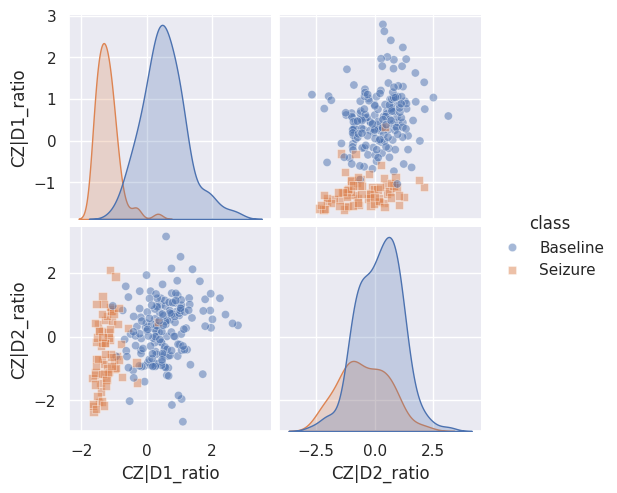

In [97]:
import seaborn as sns; sns.set(color_codes=True)

def plot_pairplot(data_x, data_y):

    data_plot = data_x.copy()
    data_plot['class'] = np.vectorize({0:'Baseline', 1:'Seizure'}.get)(data_y)
    sns.pairplot(data_plot,
                 hue = 'class',
                 hue_order = ['Baseline','Seizure'],
                 markers=["o", "s"],
                 plot_kws=dict(alpha = 0.5))
    plt.show()

plot_pairplot(reduced_df, y_train)

## Under-Sampling

Resample

Before Resample
Counter({0: 169, 1: 74})


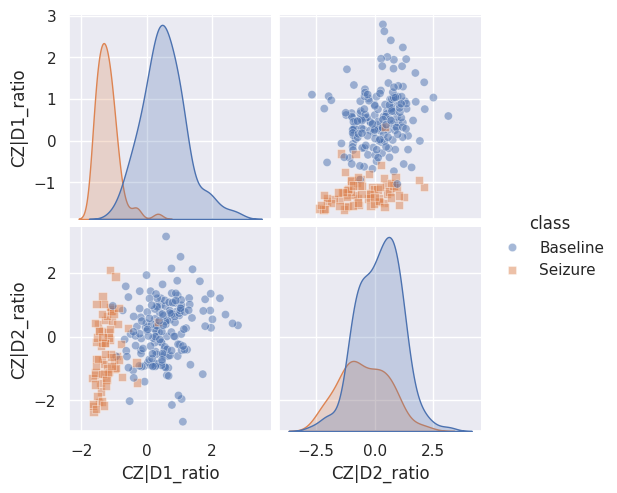

After Resample
Counter({1: 74, 0: 74})


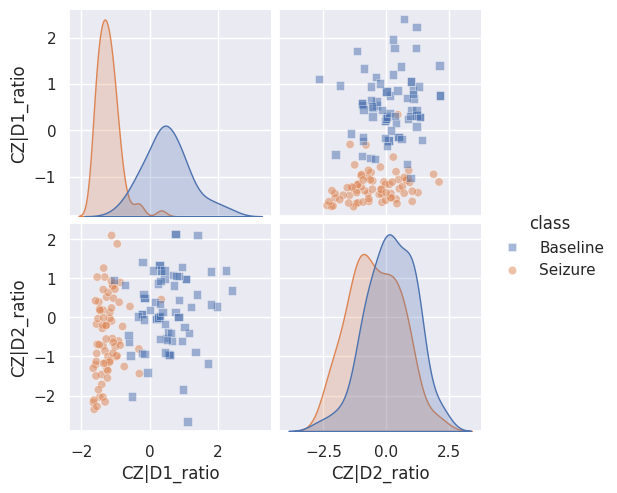

In [98]:
from sklearn.utils import resample
from collections import Counter

print(color.UNDERLINE + 'Before Resample' + color.END)
print(Counter(y_train))
plot_pairplot(reduced_df, y_train)

print(color.UNDERLINE + 'After Resample' + color.END)
data_x_downsampled, data_y_downsampled = resample(reduced_df[y_train == 0],
                                                  y_train[y_train == 0],
                                                  replace=True,
                                                  n_samples=reduced_df[y_train == 1].shape[0],
                                                  random_state=123)

data_x_bal = np.vstack((reduced_df[y_train == 1], data_x_downsampled))
data_y_bal = np.hstack((y_train[y_train == 1], data_y_downsampled))
print(Counter(data_y_bal))

plot_pairplot(pd.DataFrame(data_x_bal, columns = reduced_df.columns),
              pd.DataFrame(data_y_bal))

RandomUnderSampler

Before Resample
Counter({0: 169, 1: 74})


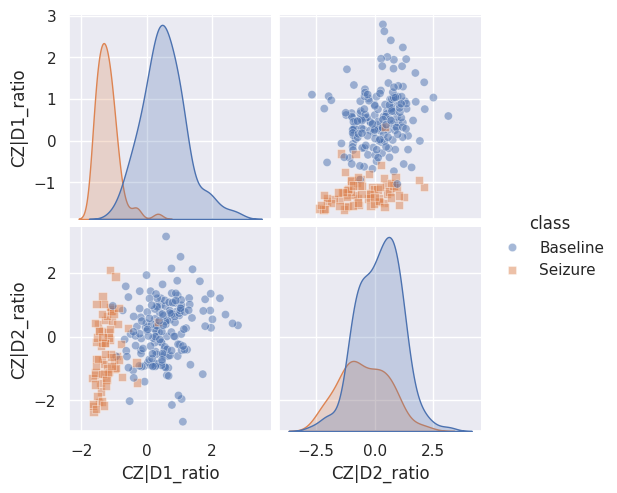

After Resample
Counter({0: 74, 1: 74})


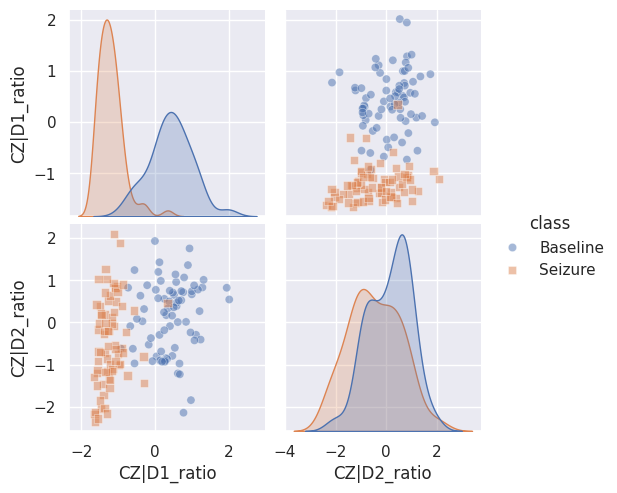

In [99]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

def imblearn_sample(sampler, data_x, data_y):

    print(color.UNDERLINE + 'Before Resample' + color.END)
    print(Counter(data_y))
    plot_pairplot(data_x, data_y)

    print(color.UNDERLINE + 'After Resample' + color.END)
    data_x_downsampled, data_y_downsampled = sampler.fit_resample(data_x,
                                                                data_y)
    print(Counter(data_y_downsampled))

    plot_pairplot(pd.DataFrame(data_x_downsampled, columns = data_x.columns),
                  pd.DataFrame(data_y_downsampled))

imblearn_sample(RandomUnderSampler(random_state=123), reduced_df, y_train)

## **Over-Sampling**

RandomOverSampler

Before Resample
Counter({0: 169, 1: 74})


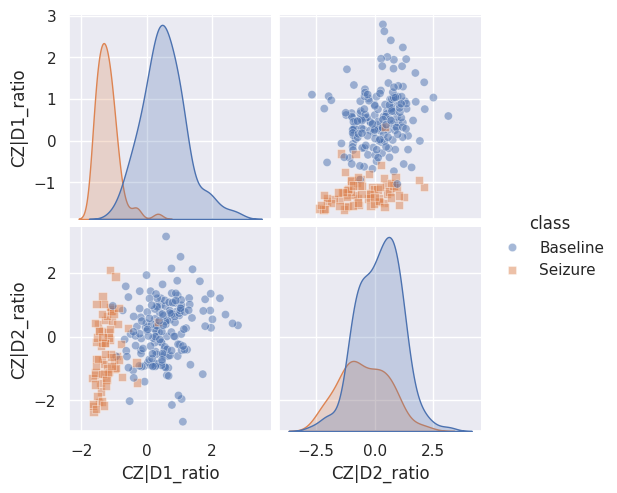

After Resample
Counter({0: 169, 1: 169})


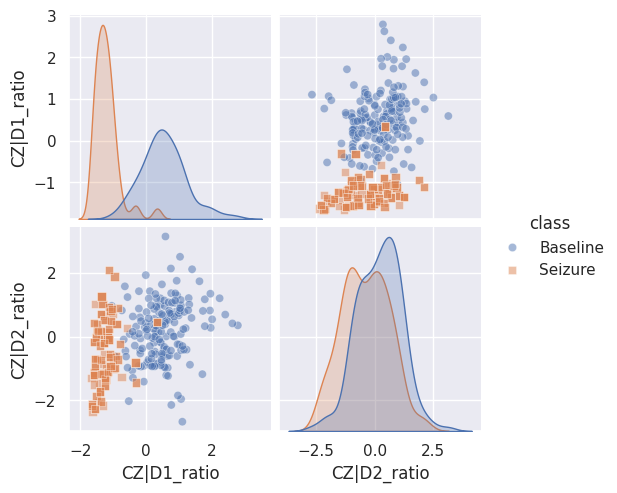

In [100]:
from imblearn.over_sampling import RandomOverSampler

imblearn_sample(RandomOverSampler(random_state=123), reduced_df, y_train)

ADASYN and SMOTE

SMOTE
Before Resample
Counter({0: 169, 1: 74})


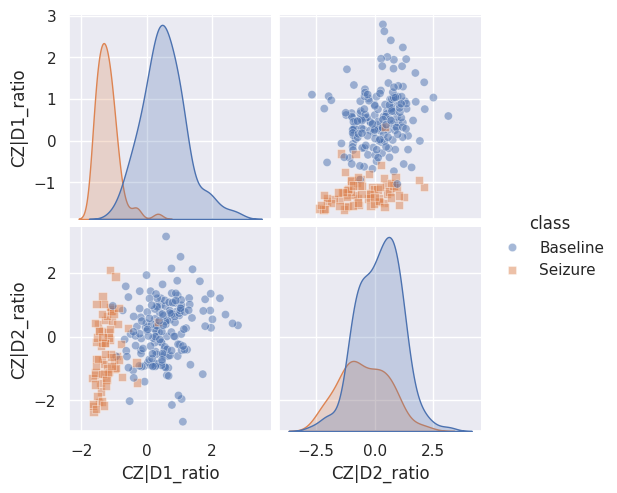

After Resample
Counter({0: 169, 1: 169})


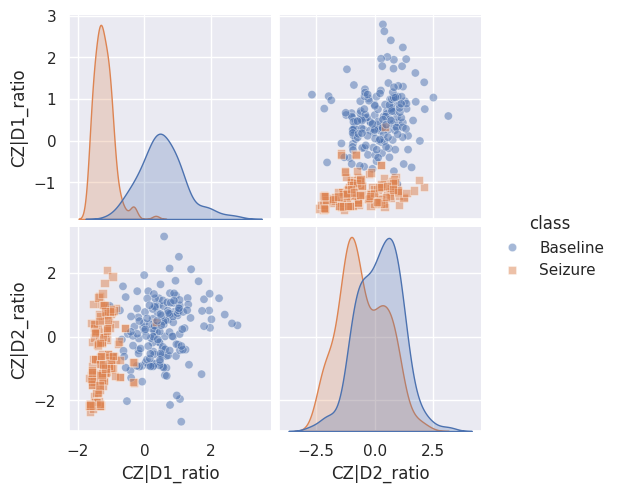

ADASYN
Before Resample
Counter({0: 169, 1: 74})


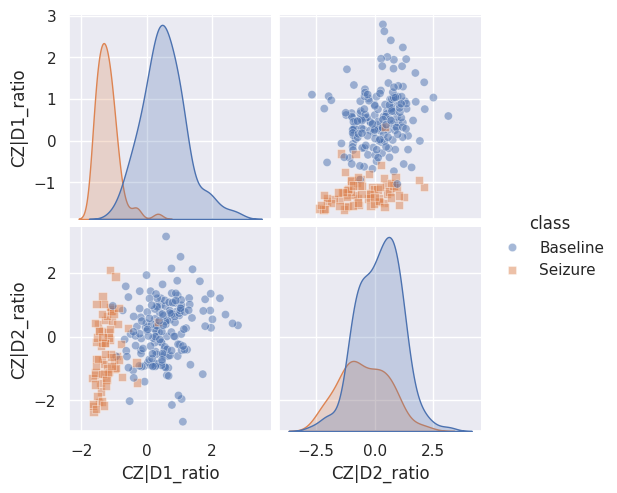

After Resample
Counter({0: 169, 1: 167})


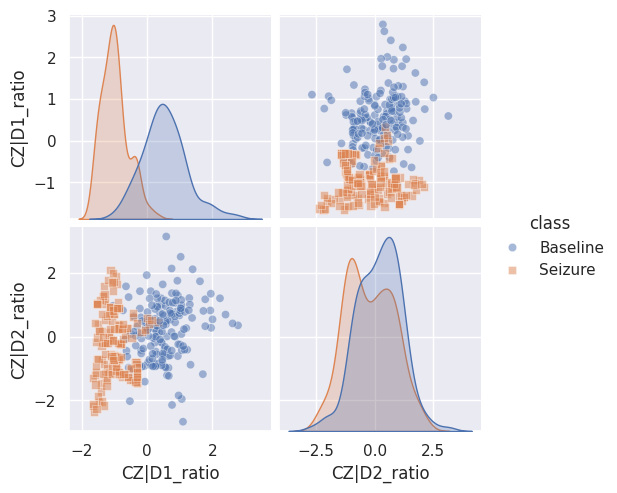

SMOTE with Edited Nearest Neighbor
Before Resample
Counter({0: 169, 1: 74})


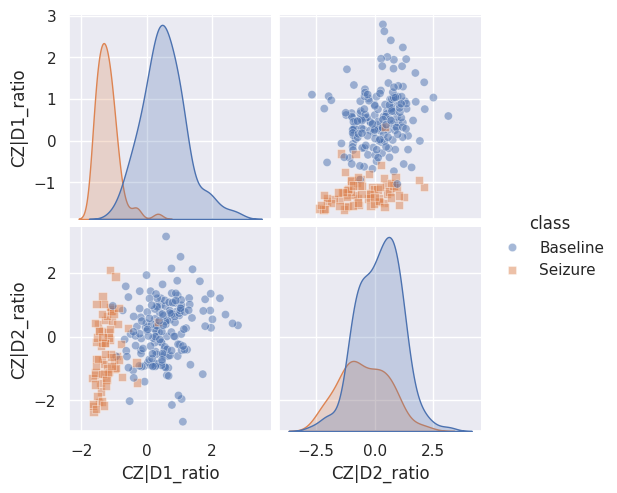

After Resample
Counter({0: 151, 1: 148})


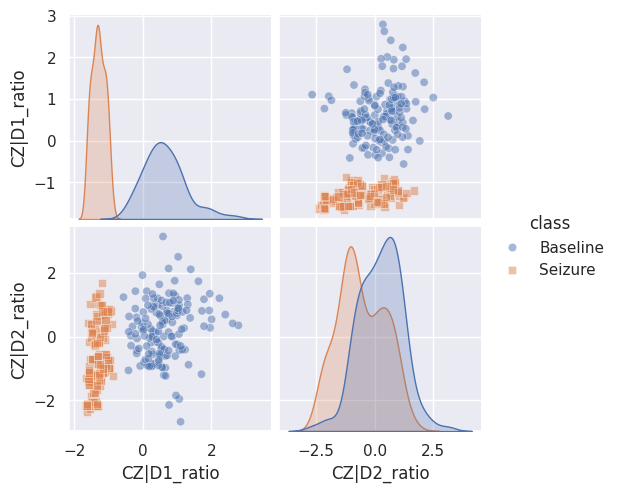

SMOTE with Tomek links
Before Resample
Counter({0: 169, 1: 74})


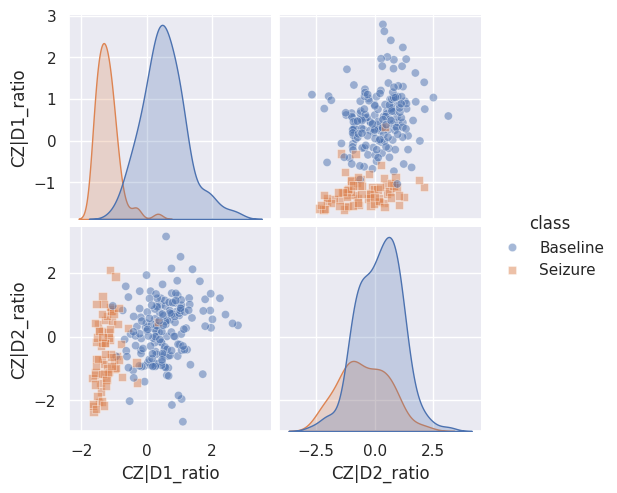

After Resample
Counter({0: 166, 1: 166})


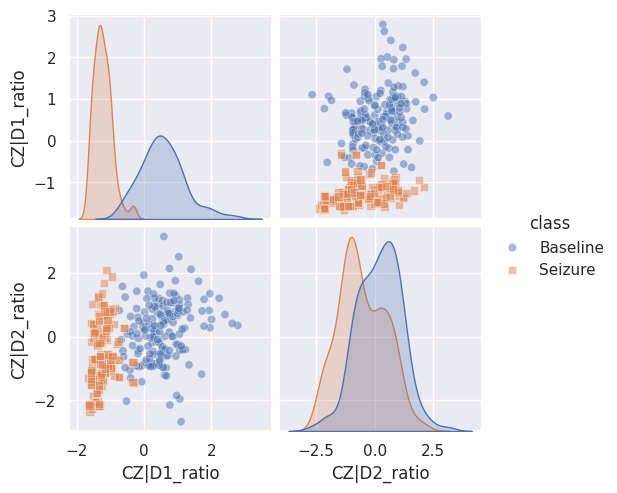

In [101]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

print(color.BOLD+color.UNDERLINE+'SMOTE'+color.END)
imblearn_sample(SMOTE(random_state=123), reduced_df, y_train)
print(color.BOLD+color.UNDERLINE+'ADASYN'+color.END)
imblearn_sample(ADASYN(random_state=123), reduced_df, y_train)
print(color.BOLD+color.UNDERLINE+'SMOTE with Edited Nearest Neighbor'+color.END)
imblearn_sample(SMOTEENN(random_state=123), reduced_df, y_train)
print(color.BOLD+color.UNDERLINE+'SMOTE with Tomek links'+color.END)
imblearn_sample(SMOTETomek(random_state=123), reduced_df, y_train)

### **Binary Classification**

# **Logistic Regression**

In [102]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(C=100.,
                         solver='liblinear',
                         random_state=RANDOM_STATE)

reg.fit(X_train_scale, y_train)

LogisticRegression(C=100.0, random_state=0, solver='liblinear')

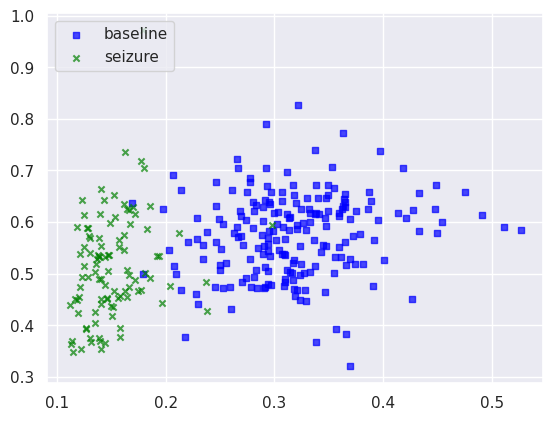

In [103]:
from mlxtend.plotting import category_scatter

x_axis_label = 'CZ|D1_ratio'
y_axis_label = 'CZ|D2_ratio'

fig = category_scatter(x=x_axis_label, y=y_axis_label, label_col='class',
                       data=feature_reduced, legend_loc='upper left')

feature_list = list(feature_reduced_drop.columns)
vis_data = X_train_scale[:,[feature_list.index(x_axis_label),
                          feature_list.index(y_axis_label)]]

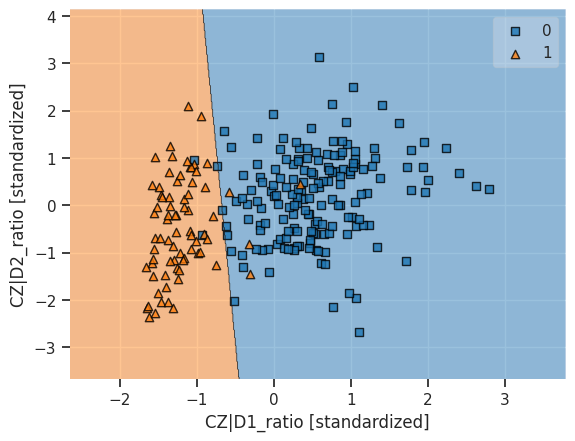

In [104]:
from mlxtend.plotting import plot_decision_regions

reg.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = reg)

plt.xlabel(x_axis_label + ' [standardized]')
plt.ylabel(y_axis_label + ' [standardized]')
plt.show()

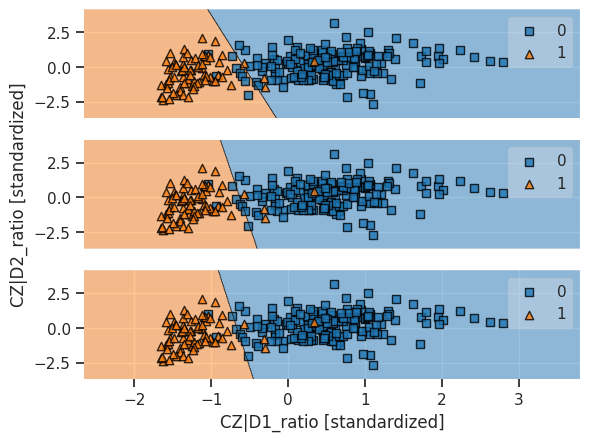

In [105]:
fig, axes = plt.subplots(3, 1, sharex=True, sharey=True)

for i, c in enumerate([0.1, 1, 10]):
    reg = LogisticRegression(C=c, solver='liblinear',random_state=RANDOM_STATE)

    reg.fit(vis_data, y_train)

    plot_decision_regions(vis_data,
                          y_train,
                          clf = reg,
                          ax = axes[i])
    axes[i].get_xaxis().set_visible(False)

axes[2].get_xaxis().set_visible(True)
plt.xlabel(x_axis_label + ' [standardized]')
axes[1].set_ylabel(y_axis_label + ' [standardized]')
plt.savefig('log_change_reg.png')
plt.show()

In [106]:
from sklearn.pipeline import Pipeline

pipe_reg = Pipeline([('scl', StandardScaler()),
                     ('clf', LogisticRegression(C=100,
                                                solver='liblinear',
                                                class_weight='balanced',
                                                random_state=RANDOM_STATE))])

pipe_reg

Pipeline(steps=[('scl', StandardScaler()),
                ('clf',
                 LogisticRegression(C=100, class_weight='balanced',
                                    random_state=0, solver='liblinear'))])

In [107]:
pipe_reg.fit(X_train, y_train)
print('Validation Accuracy: %.3f' % pipe_reg.score(X_val, y_val))

Validation Accuracy: 1.000


In [108]:
log_predicted = pipe_reg.predict(X_val)
log_predicted

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0])

In [109]:
y_val

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0])

## **Support Vector Machine (SVM)**

In [110]:
from sklearn.svm import SVC

pipe_svc_linear = Pipeline([('scl', StandardScaler()),
                            ('clf', SVC(C=100,
                                        kernel='linear',
                                        class_weight = 'balanced',
                                        random_state=RANDOM_STATE))])

pipe_svc_linear

Pipeline(steps=[('scl', StandardScaler()),
                ('clf',
                 SVC(C=100, class_weight='balanced', kernel='linear',
                     random_state=0))])

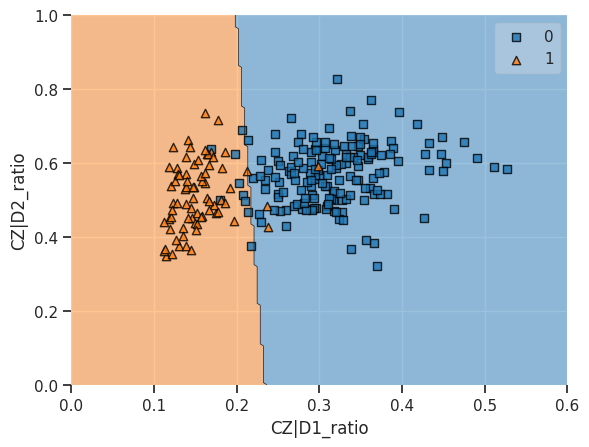

In [111]:
from mlxtend.plotting import plot_decision_regions

vis_data = X_train[:,[feature_list.index(x_axis_label),
                      feature_list.index(y_axis_label)]]

pipe_svc_linear.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = pipe_svc_linear)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)

plt.savefig('svm_linear_boundary.png')
plt.show()

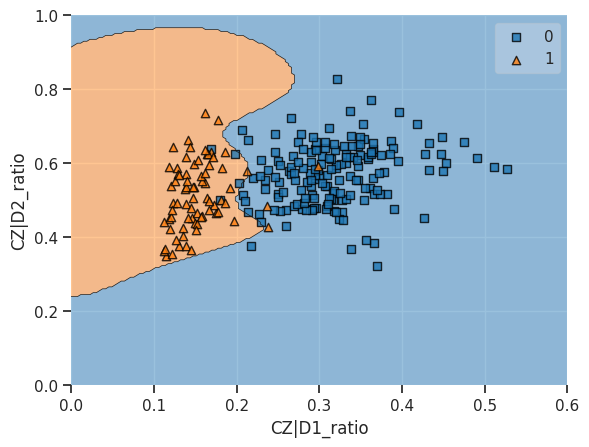

In [112]:
pipe_svc_rbf = Pipeline([('scl', StandardScaler()),
                         ('clf', SVC(C=100,
                                     kernel='rbf',
                                     class_weight = 'balanced',
                                     random_state=RANDOM_STATE))])

pipe_svc_rbf.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = pipe_svc_rbf)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)

plt.savefig('svm_rbf_boundary.png')
plt.show()

In [113]:
pipe_svc_rbf.fit(X_train, y_train)
print('Validation Accuracy: %.3f' % pipe_svc_rbf.score(X_val, y_val))

Validation Accuracy: 1.000


## **Decision Tree**

In [114]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = 1,
                            random_state=RANDOM_STATE)

DT

DecisionTreeClassifier(max_depth=1, random_state=0)

In [115]:
!pip install graphviz

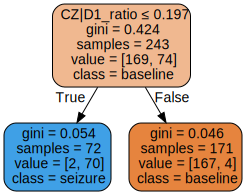

In [116]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
import graphviz

DT.fit(vis_data, y_train)
dot_data = export_graphviz(DT, out_file=None,
                     feature_names=[x_axis_label, y_axis_label],
                     class_names=feature_reduced['class'].unique(),
                     filled=True, rounded=True,
                     special_characters=True)

# Save it
graph = graph_from_dot_data(dot_data)
graph.write_png('binary_split.png')

# Show it
graphviz.Source(dot_data)

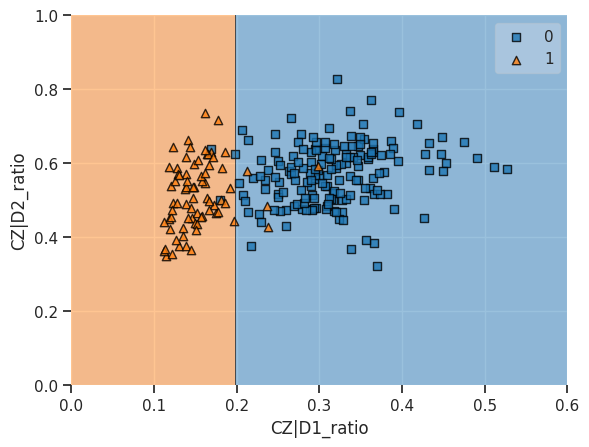

In [117]:
plot_decision_regions(vis_data,
                      y_train,
                      clf = DT)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

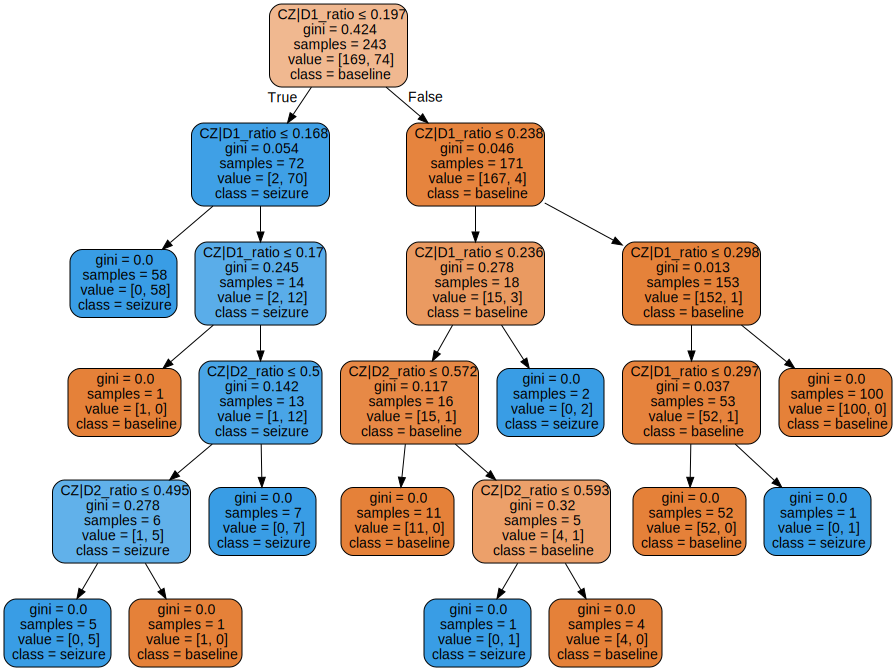

In [118]:
DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = None,
                            random_state=RANDOM_STATE)
DT.fit(vis_data, y_train)

dot_data = export_graphviz(DT, out_file=None,
                     feature_names=[x_axis_label, y_axis_label],
                     class_names=feature_reduced['class'].unique(),
                     filled=True, rounded=True,
                     special_characters=True)

# Save it
graph = graph_from_dot_data(dot_data)
graph.write_png('multi_split.png')

# Show it
graphviz.Source(dot_data)

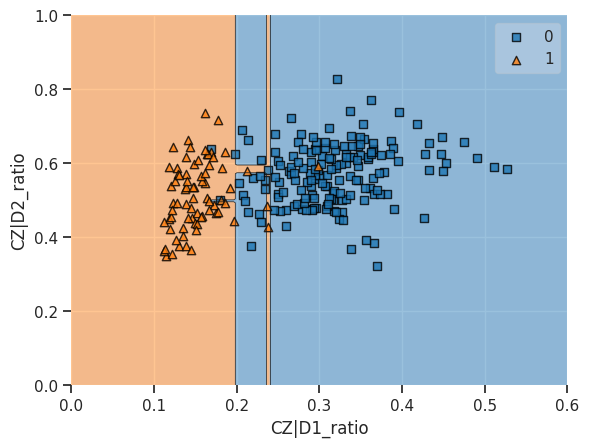

In [119]:
plot_decision_regions(vis_data,
                      y_train,
                      clf = DT)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

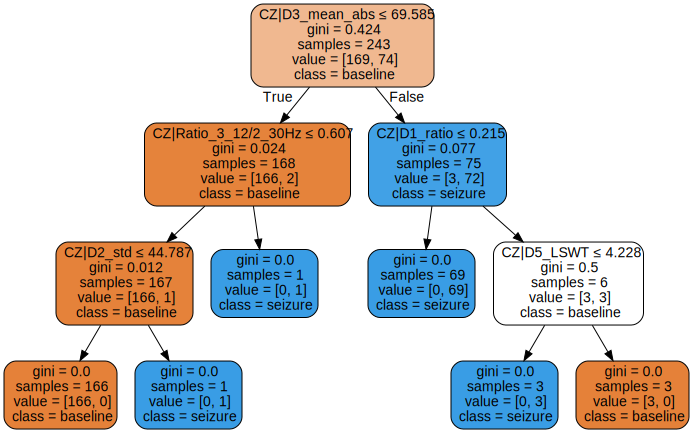

In [120]:
DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = None,
                            random_state=RANDOM_STATE)
DT.fit(X_train, y_train)

dot_data = export_graphviz(DT, out_file=None,
                     feature_names=feature_reduced_drop.columns,
                     class_names=feature_reduced['class'].unique(),
                     filled=True, rounded=True,
                     special_characters=True)

graphviz.Source(dot_data)

In [121]:
print('Validation Accuracy: %.3f' % DT.score(X_val, y_val))

Validation Accuracy: 1.000


## K-Nearest Neighbors

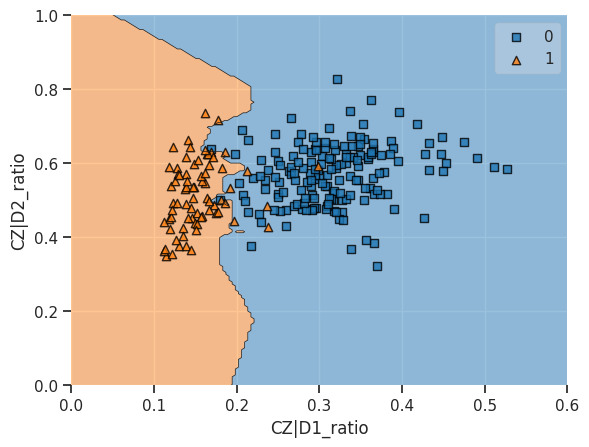

In [124]:
from sklearn.neighbors import KNeighborsClassifier
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('clf', KNeighborsClassifier(n_neighbors=2))])

pipe_knn.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = pipe_knn)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

In [125]:
pipe_knn.fit(X_train, y_train)
print('Validation Accuracy: %.3f' % pipe_knn.score(X_val, y_val))

Validation Accuracy: 1.000


### **Multiclass Classification**

In [126]:
multi_data_x = feature_df.drop(['class','file_id', 'location'],
                         axis='columns').values

# make a label encoder
le = LabelEncoder()
# change the string labels to ints
multi_data_y = le.fit_transform(feature_df['location'])

multi_X_train, multi_X_test, multi_y_train, multi_y_test = train_test_split(multi_data_x,
                                                    multi_data_y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

multi_X_train, multi_X_val, multi_y_train, multi_y_val = train_test_split(multi_X_train,
                                                  multi_y_train,
                                                  test_size=TEST_SIZE,
                                                  random_state=RANDOM_STATE)

In [127]:
multi_DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = None,
                            random_state=RANDOM_STATE)
multi_DT.fit(multi_X_train, multi_y_train)

multi_DT.predict_proba(multi_X_val[:5,:])

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

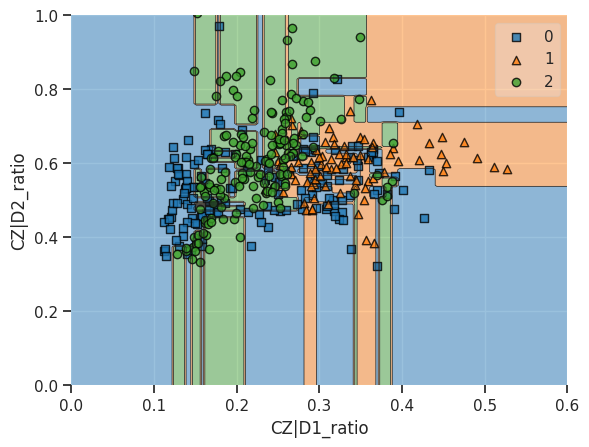

In [128]:
multi_vis_data = multi_X_train[:,[feature_list.index(x_axis_label),
                      feature_list.index(y_axis_label)]]

multi_DT.fit(multi_vis_data, multi_y_train)

plot_decision_regions(multi_vis_data,
                      multi_y_train,
                      clf = multi_DT)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

In [129]:
from sklearn.multiclass import OneVsRestClassifier

multi_pipe_svc_rbf = Pipeline([
    ('scl', StandardScaler()),
    ('clf', OneVsRestClassifier(SVC(C=100,
                                    kernel='rbf',
                                    gamma = 'auto',
                                    class_weight = 'balanced',
                                    random_state=RANDOM_STATE)))])

multi_pipe_svc_rbf.fit(multi_X_train, multi_y_train)
print('Validation Accuracy: %.3f' % multi_pipe_svc_rbf.score(multi_X_val, multi_y_val))

Validation Accuracy: 0.844


In [130]:
from sklearn.multiclass import OneVsOneClassifier

multi_pipe_svc_rbf = Pipeline([
    ('scl', StandardScaler()),
    ('clf', OneVsOneClassifier(SVC(C=100,
                                   kernel='rbf',
                                   gamma = 'auto',
                                   class_weight = 'balanced',
                                   random_state=RANDOM_STATE)))])

multi_pipe_svc_rbf.fit(multi_X_train, multi_y_train)
print('Validation Accuracy: %.3f' % multi_pipe_svc_rbf.score(multi_X_val, multi_y_val))

Validation Accuracy: 0.889


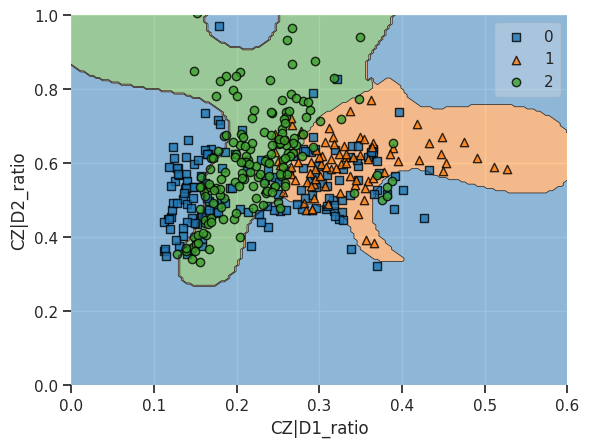

In [131]:
multi_pipe_svc_rbf.fit(multi_vis_data, multi_y_train)

plot_decision_regions(multi_vis_data,
                      multi_y_train,
                      clf = multi_pipe_svc_rbf)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

### **Model Evaluation and Hyperparameter Tuning**

# **Environment Set-up**

In [132]:
import os
import gdown
FILE_PATH = 'Epil_features.json.gzip'

if not os.path.exists(FILE_PATH):
    gdown.download('https://drive.google.com/uc?id=143dJfY1_U-p8elbvSzwe0TTHGcDo3PYv',
                './'+FILE_PATH, quiet=False)

In [133]:
import matplotlib.pyplot as plt   # for plotting
import numpy as np                # arrays
import pickle                     # saving python objects
import pandas as pd               # dataframes

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# load features dataframe
feature_df = pd.read_json(FILE_PATH, orient='index', compression = 'gzip')

# display examples of the data
display(feature_df.info())
display(feature_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 500 non-null    object 
 1   location              500 non-null    object 
 2   file_id               500 non-null    object 
 3   CZ|2_4Hz              500 non-null    float64
 4   CZ|4_8Hz              500 non-null    float64
 5   CZ|8_12Hz             500 non-null    float64
 6   CZ|12_30Hz            500 non-null    float64
 7   CZ|30_70Hz            500 non-null    float64
 8   CZ|Ratio_3_12/2_30Hz  500 non-null    float64
 9   CZ|D6_mean            500 non-null    float64
 10  CZ|D5_mean            500 non-null    float64
 11  CZ|D4_mean            500 non-null    float64
 12  CZ|D3_mean            500 non-null    float64
 13  CZ|D2_mean            500 non-null    float64
 14  CZ|D1_mean            500 non-null    float64
 15  CZ|D6_std             500 no

None

class                         location file_id     CZ|2_4Hz    CZ|4_8Hz  \
0  baseline  intracranial epileptogenic zone    F001    77.429564   28.734279   
1  baseline  intracranial epileptogenic zone    F002  1060.585071  480.018796   
2  baseline  intracranial epileptogenic zone    F003   316.076591  186.372298   
3  baseline  intracranial epileptogenic zone    F004   213.966621   91.338657   
4  baseline  intracranial epileptogenic zone    F005   973.296659  385.347164   

    CZ|8_12Hz  CZ|12_30Hz  CZ|30_70Hz  CZ|Ratio_3_12/2_30Hz  CZ|D6_mean  ...  \
0   13.102026    2.467909    0.462172              0.138219   -1.758529  ...   
1  201.886582   29.713494    4.070126              0.140057  -43.528777  ...   
2  135.970946   20.841888    2.781560              0.148809    7.140095  ...   
3   34.191639    3.157286    0.573759              0.064002  -15.857898  ...   
4  218.880920   47.891201    7.560384              0.183348  -21.433089  ...   

   CZ|D4_mean_abs  CZ|D3_mean_abs  CZ|D2_mean_abs  CZ|D1_mean_abs  CZ|D6_LSWT  \
0       28.409123       14.772764        5.266416        1.910710    0.000000   
1       81.999218       31.116812        8.462824        1.761159    0.000000   
2       87.018413       39.403208       10.376156        2.179047    7.534104   
3       45.580184       17.377872        4.953816        1.812019    0.000000   
4      113.995056       52.705751       17.566081        3.478807    8.055723   

   CZ|D5_LSWT  CZ|D4_LSWT  CZ|D3_LSWT  CZ|D2_LSWT  CZ|D1_LSWT  
0    6.427250    5.613190    5.805773    4.749819    3.665018  
1    8.241056    7.388935    7.770027    8.062119    8.020356  
2    0.000000    7.412203    6.336933    7.197397    7.170449  
3    6.422032    7.582963    6.947882    7.086014    6.950912  
4    0.000000    8.726303    8.031105    8.460379    8.480473  

[5 rows x 39 columns]

In [134]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2
RANDOM_STATE = 0

feature_reduced = feature_df[feature_df.location != 'surface']
feature_reduced_drop = feature_reduced.drop(['class', 'file_id', 'location'],
                                            axis='columns')
data_x = feature_reduced_drop.values

# make a label encoder
le = LabelEncoder()
# change the string labels to ints
data_y = le.fit_transform(feature_reduced['class'])

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=TEST_SIZE,
                                                  random_state=RANDOM_STATE)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(192, 36) (48, 36) (60, 36)
(192,) (48,) (60,)


In [135]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
pipe_reg = Pipeline([('scl', StandardScaler()),
                     ('clf', LogisticRegression(class_weight='balanced',
                                                solver = 'liblinear',
                                                random_state=RANDOM_STATE))])

# Support Vector Machine
pipe_svc = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(kernel='rbf',
                                class_weight = 'balanced',
                                probability=True,
                                random_state=RANDOM_STATE))])

# Decision Tree
DT = DecisionTreeClassifier(random_state=RANDOM_STATE)

# K-Nearest Neighbours
pipe_kkn = Pipeline([('scl', StandardScaler()),
                    ('clf', KNeighborsClassifier())])

# list of classifier names
classifier_names = ['Logistic Regression', 'Support Vector Machine',
                    'Decision Tree', 'K-Nearest Neighbors']

# list of classifiers
classifiers = [pipe_reg, pipe_svc, DT, pipe_kkn]

# fit all the classifiers to the training data
for classifier in classifiers:
  classifier.fit(X_train, y_train)

## Performance Evaluation

## Metrics

<ipython-input-136-cbd1f1d81ec6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['Baseline', 'Seizure'])
<ipython-input-136-cbd1f1d81ec6>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+['Baseline', 'Seizure'])


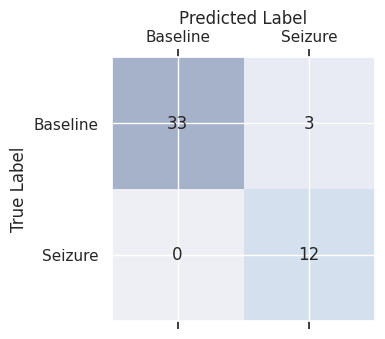

In [136]:
from sklearn.metrics import confusion_matrix

def pretty_confusion_matrix(confmat):

    # this creates the matplotlib graph to make the confmat look nicer
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    # change the labels
    ax.set_xticklabels(['']+['Baseline', 'Seizure'])
    ax.set_yticklabels(['']+['Baseline', 'Seizure'])

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    ax.xaxis.set_label_position('top')

    plt.tight_layout()

    plt.show()


# use the first classifier to predict the validation set
predictions = classifiers[1].predict(X_val)

# get the confusion matrix as a numpy array
confmat = confusion_matrix(y_true=y_val, y_pred=predictions)

# use the pretty function to make it nicer
pretty_confusion_matrix(confmat)

In [137]:
FP = confmat[0,1]
TN = confmat[0,0]
TP = confmat[1,1]
FN = confmat[1,0]

ERR = (FP+FN)/(FP+FN+TP+TN)
ACC = 1-ERR
TPR = TP/(FN+TP)
FPR = FP/(FP+TN)
PRE = TP/(TP+FP)
REC = TP/(FN+TP)
F1 = 2*((PRE*REC)/(PRE+REC))

print('True positive rate (TPR): %.3f' % TPR)
print('False positive rate (FPR): %.3f' % FPR)
print('Error (ERR): %.3f' % ERR)
print()
print('Accuracy (ACC): %.3f' % ACC)
print('Precision (PRE): %.3f' % PRE)
print('Recall (REC): %.3f' % REC)
print('F1-score (F1): %.3f' % F1)

True positive rate (TPR): 1.000
False positive rate (FPR): 0.083
Error (ERR): 0.062

Accuracy (ACC): 0.938
Precision (PRE): 0.800
Recall (REC): 1.000
F1-score (F1): 0.889


In [138]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

print('Accuracy (ACC): %.3f' % accuracy_score(y_true=y_val, y_pred=predictions))
print('Precision (PRE): %.3f' % precision_score(y_true=y_val, y_pred=predictions))
print('Recall (REC): %.3f' % recall_score(y_true=y_val, y_pred=predictions))
print('F1-score (F1): %.3f' % f1_score(y_true=y_val, y_pred=predictions))

Accuracy (ACC): 0.938
Precision (PRE): 0.800
Recall (REC): 1.000
F1-score (F1): 0.889


In [139]:
from sklearn.metrics import classification_report

pd.DataFrame(classification_report(y_val,
                                   predictions,
                                   labels=None,
                                   target_names=['Baseline', 'Seizure'],
                                   sample_weight=None,
                                   digits=2,
                                   output_dict=True))

Baseline    Seizure  accuracy  macro avg  weighted avg
precision   1.000000   0.800000    0.9375   0.900000      0.950000
recall      0.916667   1.000000    0.9375   0.958333      0.937500
f1-score    0.956522   0.888889    0.9375   0.922705      0.939614
support    36.000000  12.000000    0.9375  48.000000     48.000000

Logistic Regression


<ipython-input-136-cbd1f1d81ec6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['Baseline', 'Seizure'])
<ipython-input-136-cbd1f1d81ec6>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+['Baseline', 'Seizure'])


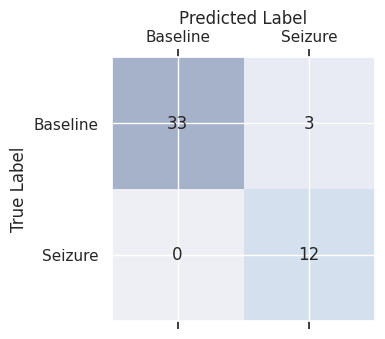

Support Vector Machine


<ipython-input-136-cbd1f1d81ec6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['Baseline', 'Seizure'])
<ipython-input-136-cbd1f1d81ec6>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+['Baseline', 'Seizure'])


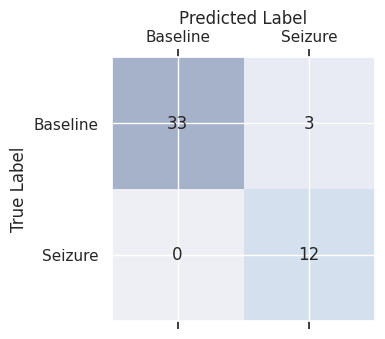

Decision Tree


<ipython-input-136-cbd1f1d81ec6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['Baseline', 'Seizure'])
<ipython-input-136-cbd1f1d81ec6>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+['Baseline', 'Seizure'])


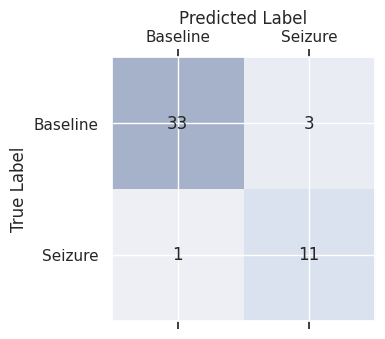

K-Nearest Neighbors


<ipython-input-136-cbd1f1d81ec6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['Baseline', 'Seizure'])
<ipython-input-136-cbd1f1d81ec6>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+['Baseline', 'Seizure'])


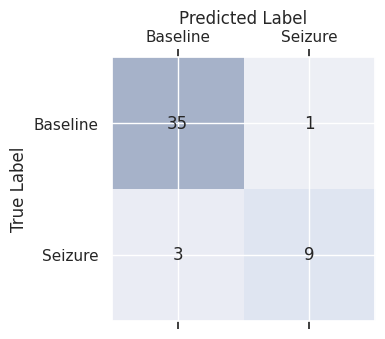

In [140]:
for i, classifier in enumerate(classifiers):
  print(color.BOLD+color.UNDERLINE+classifier_names[i]+color.END)

  predictions = classifier.predict(X_val)

  confmat = confusion_matrix(y_true=y_val, y_pred=predictions)

  pretty_confusion_matrix(confmat)

In [141]:
for i, classifier in enumerate(classifiers):
  predictions = classifier.predict(X_val)

  classifier_score_df = pd.DataFrame(
      classification_report(y_val,
                            predictions,
                            target_names=['Baseline', 'Seizure'],
                            digits=2,
                            output_dict=True))

  classifier_score_df.index.name = 'Metric'
  classifier_score_df['Classifier'] = classifier_names[i]
  classifier_score_df = classifier_score_df.set_index('Classifier', append=True)

  if i == 0:
    all_scores = classifier_score_df

  else:
    all_scores = pd.concat([all_scores, classifier_score_df])

all_scores.sort_index()

Baseline    Seizure  accuracy  macro avg  \
Metric    Classifier                                                          
f1-score  Decision Tree            0.942857   0.846154  0.916667   0.894505   
          K-Nearest Neighbors      0.945946   0.818182  0.916667   0.882064   
          Logistic Regression      0.956522   0.888889  0.937500   0.922705   
          Support Vector Machine   0.956522   0.888889  0.937500   0.922705   
precision Decision Tree            0.970588   0.785714  0.916667   0.878151   
          K-Nearest Neighbors      0.921053   0.900000  0.916667   0.910526   
          Logistic Regression      1.000000   0.800000  0.937500   0.900000   
          Support Vector Machine   1.000000   0.800000  0.937500   0.900000   
recall    Decision Tree            0.916667   0.916667  0.916667   0.916667   
          K-Nearest Neighbors      0.972222   0.750000  0.916667   0.861111   
          Logistic Regression      0.916667   1.000000  0.937500   0.958333   
          Support Vector Machine   0.916667   1.000000  0.937500   0.958333   
support   Decision Tree           36.000000  12.000000  0.916667  48.000000   
          K-Nearest Neighbors     36.000000  12.000000  0.916667  48.000000   
          Logistic Regression     36.000000  12.000000  0.937500  48.000000   
          Support Vector Machine  36.000000  12.000000  0.937500  48.000000   

                                  weighted avg  
Metric    Classifier                            
f1-score  Decision Tree               0.918681  
          K-Nearest Neighbors         0.914005  
          Logistic Regression         0.939614  
          Support Vector Machine      0.939614  
precision Decision Tree               0.924370  
          K-Nearest Neighbors         0.915789  
          Logistic Regression         0.950000  
          Support Vector Machine      0.950000  
recall    Decision Tree               0.916667  
          K-Nearest Neighbors         0.916667  
          Logistic Regression         0.937500  
          Support Vector Machine      0.937500  
support   Decision Tree              48.000000  
          K-Nearest Neighbors        48.000000  
          Logistic Regression        48.000000  
          Support Vector Machine     48.000000

## Receiver Operating Characteristic (ROC) Curve

We can also use plots to visualise each models performance.

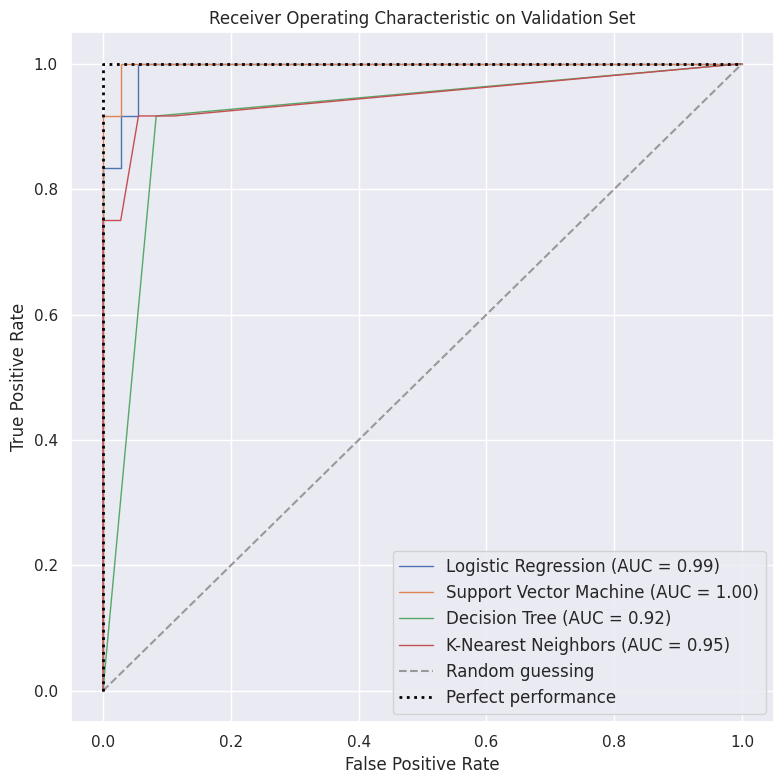

In [144]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def ROC(classifiers, classifier_names, X_train, X_val, y_train, y_val, image_file_path):
    """
    Plot the ROC curve for multiple classifiers and save the image to a specified file path.

    Parameters:
    - classifiers: List of classifier models to evaluate.
    - classifier_names: List of names corresponding to the classifiers.
    - X_train, X_val: Training and validation feature sets.
    - y_train, y_val: Training and validation labels.
    - image_file_path: Path to save the ROC curve plot.
    """
    # Set up the plot
    fig, ax = plt.subplots(figsize=(8, 8))

    # Iterate over each classifier
    for i, classifier in enumerate(classifiers):
        # Fit the classifier and predict probabilities for validation set
        probas = classifier.fit(X_train, y_train).predict_proba(X_val)

        # Get the ROC curve metrics
        fpr, tpr, thresholds = roc_curve(y_val, probas[:, 1], pos_label=1)
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve for each classifier
        ax.plot(fpr, tpr, lw=1, label='{} (AUC = {:.2f})'.format(classifier_names[i], roc_auc))

    # Plot random guessing line
    ax.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='Random guessing')

    # Plot perfect performance line
    ax.plot([0, 0, 1], [0, 1, 1], lw=2, linestyle=':', color='black', label='Perfect performance')

    # Set plot limits and labels
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic on Validation Set')
    ax.legend(loc="lower right", fontsize='medium')

    # Save and display the plot
    plt.tight_layout()
    plt.savefig(image_file_path, dpi=300)
    plt.show()

ROC(classifiers, classifier_names, X_train, X_val, y_train,
    y_val, 'Classifiers_ROC.png')


## **Ensemble Learning**

Environment Set-up

In [8]:
!pip install h5py tables kaggle mne
!pip install --upgrade imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 45.5 MB/s eta 0:00:00


In [9]:
import os                         # for file locations
import matplotlib.pyplot as plt   # for plotting
import numpy as np                # arrays
import pickle                     # saving python objects
import pandas as pd               # dataframes
import tables

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [10]:
import gdown
FILE_PATH = 'UPennMayo_features.hdf5'

if not os.path.exists(FILE_PATH):
    gdown.download('https://drive.google.com/uc?id=1-0Y0eKW9hIeOdKlYbi9UAojERKbQzi5d',
                './'+FILE_PATH, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-0Y0eKW9hIeOdKlYbi9UAojERKbQzi5d
To: /content/UPennMayo_features.hdf5
100%|██████████| 47.9M/47.9M [00:00<00:00, 49.8MB/s]


Load Data

In [11]:
# load features dataframe
h5file = tables.open_file(FILE_PATH, mode="r+")
h5file

File(filename=UPennMayo_features.hdf5, title='Upenn Features', mode='r+', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) 'Upenn Features'
/Patient_2 (Group) 'Participant Data'
/Patient_2/Data_x (EArray(7035, 848)) 'Feature Array'
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (9, 848)
/Patient_2/Data_x_Feat_Names (Array(848,)) 'Names of Each Feature'
  atom := StringAtom(itemsize=29, shape=(), dflt=b'')
  maindim := 0
  flavor := 'numpy'
  byteorder := 'irrelevant'
  chunkshape := None
/Patient_2/Data_y (EArray(7035, 1)) 'Events Array'
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8192, 1)

In [12]:
data_x = h5file.get_node('/Patient_2/Data_x')
data_y = h5file.get_node('/Patient_2/Data_y')
data_x_labels = h5file.get_node('/Patient_2/Data_x_Feat_Names')

part_feature_df = pd.DataFrame(data_x[:], columns = data_x_labels[:].astype(str))
part_feature_df['class'] = data_y[:]
part_feature_df = part_feature_df.set_index('class')
part_feature_df.head()

LMacro_01|2_4Hz  LMacro_01|4_8Hz  LMacro_01|8_12Hz  LMacro_01|12_30Hz  \
class                                                                          
1           227.771604       121.729376        104.748192          12.558394   
1           162.957202        77.334727         39.298664         159.289935   
1             7.328949        42.812358         74.461760          98.214038   
1           213.279844        85.966538         48.585487         241.390643   
1            44.163924        27.442250         42.136054         177.165579   

       LMacro_01|30_70Hz  LMacro_01|Ratio_3_12/2_30Hz  LMacro_01|D6_mean  \
class                                                                      
1               0.647189                     0.236310          -1.464481   
1              17.511810                     0.521757          -0.524147   
1               8.702826                     0.631694           4.117210   
1              19.657826                     1.773919           1.079959   
1              15.002302                     1.353723          -1.712907   

       LMacro_01|D5_mean  LMacro_01|D4_mean  LMacro_01|D3_mean  ...  \
class                                                           ...   
1              -0.824742           0.013091           0.079837  ...   
1              -2.195927           0.170249           0.077665  ...   
1              -0.597011          -0.399529           0.090689  ...   
1               0.292291           0.022378           0.049902  ...   
1               1.431398          -0.246839          -0.003639  ...   

       RMacro_04_RMacro_05|time_corr  RMacro_04_RMacro_06|time_corr  \
class                                                                 
1                           0.273753                       0.363735   
1                           0.402350                       0.379938   
1                          -0.020415                      -0.103571   
1                          -0.194032                      -0.129580   
1                           0.099375                       0.115953   

       RMacro_04_RMacro_07|time_corr  RMacro_04_RMacro_08|time_corr  \
class                                                                 
1                           0.389202                       0.297462   
1                           0.046323                      -0.029894   
1                          -0.071538                      -0.048586   
1                           0.018119                       0.232352   
1                           0.158055                       0.105109   

       RMacro_05_RMacro_06|time_corr  RMacro_05_RMacro_07|time_corr  \
class                                                                 
1                           0.789810                       0.652605   
1                           0.765875                       0.426919   
1                           0.807652                       0.638780   
1                           0.842868                       0.673148   
1                           0.680998                       0.362963   

       RMacro_05_RMacro_08|time_corr  RMacro_06_RMacro_07|time_corr  \
class                                                                 
1                           0.519944                       0.953851   
1                           0.379509                       0.808733   
1                           0.563594                       0.936139   
1                           0.445052                       0.857085   
1                           0.242693                       0.834629   

       RMacro_06_RMacro_08|time_corr  RMacro_07_RMacro_08|time_corr  
class                                                                
1                           0.796902                       0.888274  
1                           0.732159                       0.911896  
1                           0.864730                       0.954777  
1                           0.559804                       0.861035  
1  

## **Data Preparation**

In [13]:
part_feature_df.index.value_counts()

class
2    3894
0    2990
1     151
Name: count, dtype: int64

In [14]:
reduced_features = part_feature_df.loc[[0,1]]
reduced_features.head()

LMacro_01|2_4Hz  LMacro_01|4_8Hz  LMacro_01|8_12Hz  LMacro_01|12_30Hz  \
class                                                                          
0           114.541010        26.387061         11.821119           1.357175   
0            27.574621        43.245174         18.910574           0.791160   
0            58.207500        18.142876          8.238157           1.537487   
0           142.960698        11.285728         13.005110           1.014406   
0           221.105230        39.302649         28.439736           3.143172   

       LMacro_01|30_70Hz  LMacro_01|Ratio_3_12/2_30Hz  LMacro_01|D6_mean  \
class                                                                      
0               0.127231                     0.080726          -0.128602   
0               0.113143                     0.028620          -0.566416   
0               0.341276                     0.179073           0.500630   
0               0.283393                     0.118613          -0.823890   
0               0.317358                     0.072439           0.119001   

       LMacro_01|D5_mean  LMacro_01|D4_mean  LMacro_01|D3_mean  ...  \
class                                                           ...   
0               0.118216          -0.101168          -0.033279  ...   
0              -0.064466          -0.082230           0.007399  ...   
0              -0.156088           0.016892           0.061672  ...   
0               0.296830           0.030066          -0.039112  ...   
0               0.103982          -0.235290          -0.002702  ...   

       RMacro_04_RMacro_05|time_corr  RMacro_04_RMacro_06|time_corr  \
class                                                                 
0                          -0.303116                      -0.431413   
0                          -0.427137                      -0.388867   
0                           0.121037                       0.126031   
0                           0.119059                       0.116303   
0                          -0.272180                       0.054720   

       RMacro_04_RMacro_07|time_corr  RMacro_04_RMacro_08|time_corr  \
class                                                                 
0                          -0.376480                      -0.411506   
0                          -0.327155                      -0.370580   
0                           0.092073                      -0.025342   
0                           0.282626                       0.113695   
0                          -0.089779                       0.077794   

       RMacro_05_RMacro_06|time_corr  RMacro_05_RMacro_07|time_corr  \
class                                                                 
0                           0.544665                       0.179166   
0                           0.750489                       0.593814   
0                           0.779517                       0.483535   
0                           0.737446                       0.529281   
0                           0.721609                       0.470620   

       RMacro_05_RMacro_08|time_corr  RMacro_06_RMacro_07|time_corr  \
class                                                                 
0                           0.469152                       0.890269   
0                           0.665086                       0.956724   
0                           0.452129                       0.887166   
0                           0.288499                       0.719412   
0                           0.344036                       0.810304   

       RMacro_06_RMacro_08|time_corr  RMacro_07_RMacro_08|time_corr  
class                                                                
0                           0.827349                       0.822477  
0                           0.870345                       0.912751  
0                           0.724896                       0.718923  
0                           0.648070                       0.786587  
0  

In [15]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.1
RANDOM_STATE = 0

# turn to numpy array
data_x = reduced_features.values

# create condition(group) array
data_y = reduced_features.index.values

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(2543, 848) (283, 848) (315, 848)
(2543,) (283,) (315,)


## **Averaging Methods**

## Bagging

In [16]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=0.8, random_state = RANDOM_STATE)),
                     ('clf', SVC(kernel='rbf', random_state=RANDOM_STATE))])

bag = BaggingClassifier(base_estimator=pipe_svc,
                        n_estimators=10,
                        max_samples=0.5,
                        max_features=0.5,
                        bootstrap=True,
                        bootstrap_features=True,
                        oob_score=True,
                        warm_start=False,
                        n_jobs=-1,
                        random_state=RANDOM_STATE)
bag.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


CPU times: user 874 ms, sys: 594 ms, total: 1.47 s
Wall time: 4.97 s


BaggingClassifier(base_estimator=Pipeline(steps=[('scl', StandardScaler()),
                                                 ('pca',
                                                  PCA(n_components=0.8,
                                                      random_state=0)),
                                                 ('clf', SVC(random_state=0))]),
                  bootstrap_features=True, max_features=0.5, max_samples=0.5,
                  n_jobs=-1, oob_score=True, random_state=0)

In [17]:
y_pred = bag.predict(X_val)

display(pd.DataFrame(classification_report(y_val, y_pred , output_dict =True)))

0          1  accuracy   macro avg  weighted avg
precision    0.985294   0.818182  0.978799    0.901738      0.977618
recall       0.992593   0.692308  0.978799    0.842450      0.978799
f1-score     0.988930   0.750000  0.978799    0.869465      0.977954
support    270.000000  13.000000  0.978799  283.000000    283.000000

In [18]:
bag.oob_score_

0.9897758552890287

In [19]:
!pip install -U imbalanced-learn

from imblearn.ensemble import BalancedBaggingClassifier

bal_bag = BalancedBaggingClassifier(estimator=pipe_svc, # Changed 'base_estimator' to 'estimator'
                                n_estimators=10,
                                max_samples=0.5,
                                max_features=0.5,
                                bootstrap=True,
                                bootstrap_features=True,
                                oob_score=True,
                                warm_start=False,
                                sampling_strategy ='majority',
                                replacement=True,
                                n_jobs=-1,
                                random_state=RANDOM_STATE)
bal_bag.fit(X_train, y_train)

y_pred = bal_bag.predict(X_val)

display(pd.DataFrame(classification_report(y_val, y_pred , output_dict =True)))

0          1  accuracy   macro avg  weighted avg
precision    1.000000   0.590909  0.968198    0.795455      0.981208
recall       0.966667   1.000000  0.968198    0.983333      0.968198
f1-score     0.983051   0.742857  0.968198    0.862954      0.972017
support    270.000000  13.000000  0.968198  283.000000    283.000000

## **Random Forests**

In [20]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=1000,
                                max_features = 'sqrt',
                                class_weight = 'balanced',
                                random_state=RANDOM_STATE,
                                n_jobs=-1)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_val)

display(pd.DataFrame(classification_report(y_val, y_pred , output_dict = True)))

0          1  accuracy   macro avg  weighted avg
precision    0.996296   0.923077  0.992933    0.959687      0.992933
recall       0.996296   0.923077  0.992933    0.959687      0.992933
f1-score     0.996296   0.923077  0.992933    0.959687      0.992933
support    270.000000  13.000000  0.992933  283.000000    283.000000

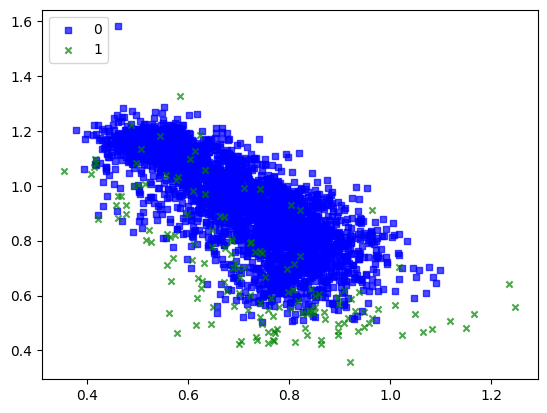

In [21]:
from mlxtend.plotting import category_scatter

x_axis_label = 'LMacro_03|D4_ratio'
y_axis_label =  'LMacro_03|D2_ratio'

reduced_features_reset = reduced_features.reset_index()

fig = category_scatter(x=x_axis_label, y=y_axis_label, label_col='class',
                       data=reduced_features_reset, legend_loc='upper left')

feature_list = list(reduced_features.columns)

two_features_data = reduced_features.iloc[:,[feature_list.index(x_axis_label),feature_list.index(y_axis_label)]]


Tree


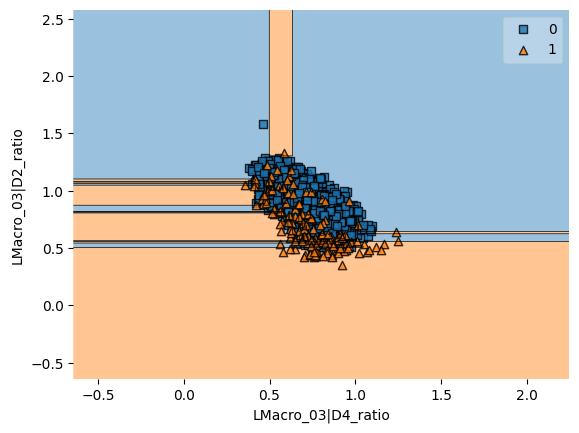

Forest


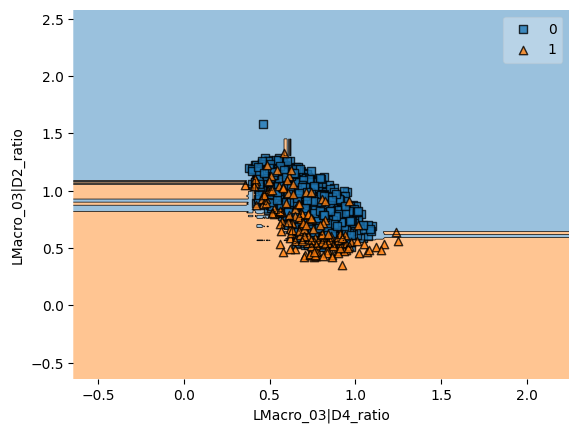

In [22]:
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree = DecisionTreeClassifier(criterion='gini',
                              class_weight = 'balanced',
                              random_state=RANDOM_STATE)

tree_dict = {'Tree':tree, 'Forest':forest}

for classifier_name in tree_dict:

  tree_dict[classifier_name].fit(two_features_data.values, reduced_features_reset['class'].values)

  plot_decision_regions(two_features_data.values,
                        reduced_features_reset['class'].values,
                        clf = tree_dict[classifier_name])

  plt.xlabel(x_axis_label)
  plt.ylabel(y_axis_label)

  print(color.BOLD+color.UNDERLINE+classifier_name+color.END)
  plt.show()

In [23]:
from sklearn.ensemble import ExtraTreesClassifier

# create a forest classifier
ETSC = ExtraTreesClassifier(criterion='gini',
                            n_estimators=1000,
                            max_features = 'sqrt',
                            class_weight = 'balanced',
                            random_state=RANDOM_STATE,
                            n_jobs=-1)

ETSC.fit(X_train, y_train)

y_pred = ETSC.predict(X_val)

display(pd.DataFrame(classification_report(y_val, y_pred, output_dict = True)))

0          1  accuracy   macro avg  weighted avg
precision    0.996296   0.923077  0.992933    0.959687      0.992933
recall       0.996296   0.923077  0.992933    0.959687      0.992933
f1-score     0.996296   0.923077  0.992933    0.959687      0.992933
support    270.000000  13.000000  0.992933  283.000000    283.000000

In [24]:
from imblearn.ensemble import BalancedRandomForestClassifier

bal_forest = BalancedRandomForestClassifier(criterion='gini',
                                            n_estimators=1000,
                                            max_features = 'sqrt',
                                            random_state=RANDOM_STATE,
                                            n_jobs=-1
                                            )
bal_forest.fit(X_train, y_train)

y_pred = bal_forest.predict(X_val)

display(pd.DataFrame(classification_report(y_val, y_pred , output_dict = True)))

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


0          1  accuracy   macro avg  weighted avg
precision    1.000000   0.520000  0.957597    0.760000      0.977951
recall       0.955556   1.000000  0.957597    0.977778      0.957597
f1-score     0.977273   0.684211  0.957597    0.830742      0.963811
support    270.000000  13.000000  0.957597  283.000000    283.000000

# Majority Voting

In [25]:
%%time
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import NeighbourhoodCleaningRule
from sklearn.decomposition import PCA
import timeit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, make_scorer

clf1 = Pipeline([('scl', StandardScaler()),
                 ('clf', SVC(kernel='rbf',
                             gamma='auto',
                             random_state=RANDOM_STATE,
                             probability = True))])

clf2 = Pipeline([('scl', StandardScaler()),
                 ('clf', LogisticRegression(solver='liblinear',
                                            random_state=RANDOM_STATE))
])

clf3 = DecisionTreeClassifier(random_state=RANDOM_STATE)

clf_labels = ['SVM', # Support Vector Machine
              'LR', # LogisticRegression
              'DT'] # Decision Tree

# Majority Rule Voting
hard_mv_clf = VotingClassifier(estimators=[(clf_labels[0],clf1),
                                           (clf_labels[1],clf2),
                                           (clf_labels[2],clf3)],
                               voting='hard')

soft_mv_clf = VotingClassifier(estimators=[(clf_labels[0],clf1),
                                           (clf_labels[1],clf2),
                                           (clf_labels[2],clf3)],
                               voting='soft')

clf_labels += ['Hard Majority Voting', 'Soft Majority Voting']
all_clf = [clf1, clf2, clf3, hard_mv_clf, soft_mv_clf]

print(color.BOLD+color.UNDERLINE+'Validation Scores\n'+color.END)
for clf, label in zip(all_clf, clf_labels):
    start = timeit.default_timer() # TIME STUFF

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_val)
    scores = f1_score(y_val, y_pred)
    print(color.BOLD+label+color.END)
    print("Score: %0.3f"
          % scores)
    # TIME STUFF
    stop = timeit.default_timer()
    print("Run time:", np.round((stop-start)/60,2),"minutes")
    print()

Validation Scores

SVM
Score: 0.889
Run time: 0.07 minutes

LR
Score: 0.897
Run time: 0.03 minutes

DT
Score: 0.727
Run time: 0.08 minutes

Hard Majority Voting
Score: 0.857
Run time: 0.18 minutes

Soft Majority Voting
Score: 0.897
Run time: 0.14 minutes

CPU times: user 26.7 s, sys: 326 ms, total: 27 s
Wall time: 30.4 s


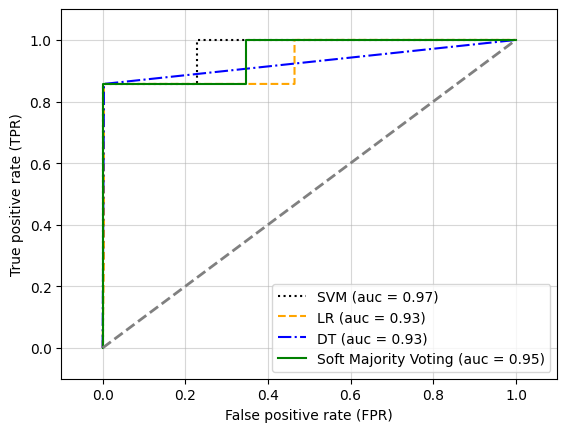

CPU times: user 18.6 s, sys: 285 ms, total: 18.9 s
Wall time: 25.6 s


In [26]:
%%time
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# remove the hard voting because doesnt have predict proba
del clf_labels[3], all_clf[3]

colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls \
        in zip(all_clf,
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train,
                          y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

#plt.savefig(os.path.join(IMAGE_DIR, 'Pipeline_Rocs.png'), dpi=300)
plt.show()

## **Boosting Methods**

# AdaBoost

In [27]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=1,
                              random_state=RANDOM_STATE)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=100,
                         learning_rate=0.1,
                         random_state=RANDOM_STATE)

ada.fit(X_train, y_train)

y_pred = ada.predict(X_val)

display(pd.DataFrame(classification_report(y_val, y_pred , output_dict = True)))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0          1  accuracy   macro avg  weighted avg
precision    1.000000   0.928571  0.996466    0.964286      0.996719
recall       0.996296   1.000000  0.996466    0.998148      0.996466
f1-score     0.998145   0.962963  0.996466    0.980554      0.996529
support    270.000000  13.000000  0.996466  283.000000    283.000000

CPU times: user 49.1 s, sys: 79.8 ms, total: 49.2 s
Wall time: 52.9 s


Gradient Boosting

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tree_reg1 = DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE)
tree_reg1.fit(X_train, y_train)

y_train2 = y_train - tree_reg1.predict(X_train)
tree_reg2 = DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE)
tree_reg2.fit(X_train, y_train2)

y_train3 = y_train2 - tree_reg2.predict(X_train)
tree_reg3 = DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE)
tree_reg3.fit(X_train, y_train3)

y_pred = sum(tree.predict(X_val) for tree in (tree_reg1, tree_reg2, tree_reg3))

pd.DataFrame(classification_report(y_val, y_pred , output_dict =True))

0          1  accuracy   macro avg  weighted avg
precision    0.996269   0.800000  0.985866    0.898134      0.987253
recall       0.988889   0.923077  0.985866    0.955983      0.985866
f1-score     0.992565   0.857143  0.985866    0.924854      0.986344
support    270.000000  13.000000  0.985866  283.000000    283.000000

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(max_depth = 2, n_estimators=3,
                                 learning_rate=1.0, random_state=RANDOM_STATE)
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_val)
pd.DataFrame(classification_report(y_val, y_pred , output_dict = True))

0          1  accuracy   macro avg  weighted avg
precision    0.996269   0.800000  0.985866    0.898134      0.987253
recall       0.988889   0.923077  0.985866    0.955983      0.985866
f1-score     0.992565   0.857143  0.985866    0.924854      0.986344
support    270.000000  13.000000  0.985866  283.000000    283.000000

In [30]:
from sklearn.metrics import accuracy_score

GBC = GradientBoostingClassifier(max_depth = 2, n_estimators =30)
GBC.fit(X_train, y_train)

scores = [accuracy_score(y_val, y_pred)
          for y_pred in GBC.staged_predict(X_val)]
bst_n_estimators = np.argmax(scores)

GBC_best = GradientBoostingClassifier(max_depth = 2,
                                      n_estimators = bst_n_estimators,
                                      random_state = RANDOM_STATE)
GBC_best.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=9, random_state=0)

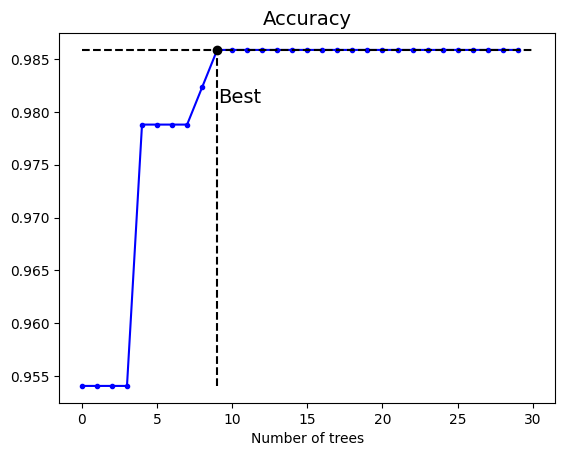

In [31]:
worst_score = np.min(scores)
best_score = np.max(scores)

plt.plot(scores, "b.-")
plt.plot([0, 30], [best_score, best_score], "k--")
plt.plot(bst_n_estimators, best_score, "ko")
plt.plot([bst_n_estimators, bst_n_estimators], [worst_score, best_score], "k--")
plt.text(bst_n_estimators+1.5, best_score-0.005, "Best", ha="center", fontsize=14)
plt.xlabel("Number of trees")
plt.title("Accuracy", fontsize=14)

plt.show()

In [32]:
gbrt = GradientBoostingClassifier(max_depth=2, warm_start=True, subsample = 0.5, random_state=RANDOM_STATE)

max_val_score = float(0)
score_not_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_score = accuracy_score(y_val, y_pred)
    if val_score > max_val_score:
        max_val_score = val_score
        score_not_going_up = 0
    else:
        score_not_going_up += 1
        if score_not_going_up == 5:
            break  # early stopping

print("Number of estimators:", gbrt.n_estimators)
print("Maximum Accuracy:", max_val_score)

Number of estimators: 10
Maximum Accuracy: 0.9858657243816255


XgBoost

In [33]:
from xgboost import XGBClassifier

%timeit XGBClassifier(n_estimators =10, random_state=RANDOM_STATE).fit(X_train, y_train)

2.67 s ± 452 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
%timeit AdaBoostClassifier(n_estimators =10, random_state=RANDOM_STATE).fit(X_train, y_train)

5.87 s ± 1.2 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
%timeit GradientBoostingClassifier(n_estimators =10, random_state=RANDOM_STATE).fit(X_train, y_train)

11.4 s ± 535 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
XGmodel = XGBClassifier(max_depth = 3,
                        learning_rate = 0.1,
                        n_estimators=500,
                        booster = 'gbtree',
                        n_jobs =-1,
                        random_state=RANDOM_STATE)

XGmodel.fit(X_train, y_train)

y_pred = XGmodel.predict(X_val)

display(pd.DataFrame(classification_report(y_val, y_pred , output_dict = True)))

0          1  accuracy   macro avg  weighted avg
precision    1.000000   0.928571  0.996466    0.964286      0.996719
recall       0.996296   1.000000  0.996466    0.998148      0.996466
f1-score     0.998145   0.962963  0.996466    0.980554      0.996529
support    270.000000  13.000000  0.996466  283.000000    283.000000

LightGBM

In [37]:
from lightgbm import LGBMClassifier

%timeit LGBMClassifier(n_estimators =10, random_state=RANDOM_STATE).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 131, number of negative: 2412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 216240
[LightGBM] [Info] Number of data points in the train set: 2543, number of used features: 848
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.051514 -> initscore=-2.913014
[LightGBM] [Info] Start training from score -2.913014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 131, number of nega

In [38]:
LGBM_model = LGBMClassifier(boosting_type='gbdt',
                            max_depth=3,
                            n_estimators=500,
                            random_state=RANDOM_STATE,
                            neg_bagging_fraction = 0.5, # for subsampling interictal data
                            n_jobs =-1,
                            bagging_seed = RANDOM_STATE)

LGBM_model.fit(X_train, y_train)

y_pred = LGBM_model.predict(X_val)

display(pd.DataFrame(classification_report(y_val, y_pred , output_dict = True)))

[LightGBM] [Info] Number of positive: 131, number of negative: 2412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037359 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 216240
[LightGBM] [Info] Number of data points in the train set: 2543, number of used features: 848
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.051514 -> initscore=-2.913014
[LightGBM] [Info] Start training from score -2.913014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

0          1  accuracy   macro avg  weighted avg
precision    1.000000   0.928571  0.996466    0.964286      0.996719
recall       0.996296   1.000000  0.996466    0.998148      0.996466
f1-score     0.998145   0.962963  0.996466    0.980554      0.996529
support    270.000000  13.000000  0.996466  283.000000    283.000000